## **Importing Libraries:**

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
color = sns.color_palette()
import statsmodels.api as sm
import statsmodels.formula.api as SM

import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
import sklearn.metrics as metrics
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

## **Part A: Credit Risk Analysis (Complete Python Workflow)**

### Problem Statement:


Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interest on existing debts as well as new borrowings. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.

A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.
Data that is available includes information from the financial statement of the companies for the previous year.

### Data Dictionary:

* Co_Code: Company Code
* Co_Name: Company Name
* _Operating_Expense_Rate: Operating Expense Rate: Operating Expenses/Net Sales. The operating expense ratio (OER) is the cost to operate a piece of property compared to the income the property brings in.
* _Research_and_development_expense_rate: Research and development expense rate: (Research and Development Expenses)/Net Sales. Research and development (R&D) expenses are direct expenditures relating to a company's efforts to develop, design, and enhance its products, services, technologies, or processes.
* _Cash_flow_rate: Cash flow rate: Cash Flow from Operating/Current Liabilities. Cash flow is a measure of how much cash a business brought in or spent in total over a period of time.
* _Interest_bearing_debt_interest_rate:  Interest-bearing debt interest rate: Interest-bearing Debt/Equity
* _Tax_rate_A: Tax rate (A): Effective Tax Rate. Effective tax rate represents the percentage of their taxable income that individuals pay in taxes. For corporations, the effective corporate tax rate is the rate they pay on their pre-tax profits.
* _Cash_Flow_Per_Share: Cash Flow Per Share. It is the after-tax earnings plus depreciation on a per-share basis that functions as a measure of a firm's financial strength
* _Per_Share_Net_profit_before_tax_Yuan_: Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share. Pretax income, also known as earnings before tax or pretax earnings, is the net income earned by a business before taxes are subtracted/accounted for.
* _Realized_Sales_Gross_Profit_Growth_Rate: Realized Sales Gross Profit Growth Rate.
* _Operating_Profit_Growth_Rate: Operating Profit Growth Rate: Operating Income Growth. It is the rate of increase in operating income over the last year.
* _Continuous_Net_Profit_Growth_Rate: Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth
* _Total_Asset_Growth_Rate: Total Asset Growth Rate: Total Asset Growth. It is the rate at which how quickly the company has been growing its Assets
* _Net_Value_Growth_Rate: Net Value Growth Rate: Total Equity Growth
* _Total_Asset_Return_Growth_Rate_Ratio: Total Asset Return Growth Rate Ratio: Return on Total Asset Growth
* _Cash_Reinvestment_perc: Cash Reinvestment %: Cash Reinvestment Ratio. It is the valuation ratio that is used to measure the percentage of annual cash flow that the company invests back into the business as a new investment.
* _Current_Ratio: Current Ratio. The current ratio describes the relationship between a company's assets and liabilities
* _Quick_Ratio: Quick Ratio: Acid Test. Acid-test ratio (also known as quick ratio) is a measure of a company's liquidity, which is its ability to pay its short-term obligations using only its most liquid assets.
* _Interest_Expense_Ratio: Interest Expense Ratio: Interest Expenses/Total Revenue
* _Total_debt_to_Total_net_worth: Total debt/Total net worth: Total Liability/Equity Ratio
* _Long_term_fund_suitability_ratio_A: Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets
* _Net_profit_before_tax_to_Paid_in_capital: Net profit before tax/Paid-in capital: Pretax Income/Capital
* _Total_Asset_Turnover: Total Asset Turnover. Net Sales/Average Total Assets
* _Accounts_Receivable_Turnover: Accounts Receivable Turnover. The accounts receivable turnover ratio, or receivables turnover, is used in business accounting to quantify how well companies are managing the credit that they extend to their customers by evaluating how long it takes to collect the outstanding debt throughout the accounting period.
* _Average_Collection_Days: Average Collection Days: Days Receivable Outstanding
* _Inventory_Turnover_Rate_times: Inventory Turnover Rate (times). The inventory turnover ratio is the number of times a company has sold and replenished its inventory over a specific amount of time. The formula can also be used to calculate the number of days it will take to sell the inventory on hand.
* _Fixed_Assets_Turnover_Frequency: Fixed Assets Turnover Frequency. Fixed Asset Turnover (FAT) is an efficiency ratio that indicates how well or efficiently a business uses fixed assets to generate sales. This ratio divides net sales by net fixed assets, calculated over an annual period.
* _Net_Worth_Turnover_Rate_times: Net Worth Turnover Rate (times): Equity Turnover. Equity turnover is a ratio that measures the proportion of a company's sales to its stockholders' equity. The intent of the measurement is to determine the efficiency with which management is using equity to generate revenue.
* _Operating_profit_per_person: Operating profit per person: Operation Income Per Employee
* _Allocation_rate_per_person: Allocation rate per person: Fixed Assets Per Employee
* _Quick_Assets_to_Total_Assets: Quick Assets/Total Assets
* _Cash_to_Total_Assets: Cash/Total Assets
* _Quick_Assets_to_Current_Liability: Quick Assets/Current Liability
* _Cash_to_Current_Liability: Cash/Current Liability
* _Operating_Funds_to_Liability: Operating Funds to Liability
* _Inventory_to_Working_Capital: Inventory/Working Capital
* _Inventory_to_Current_Liability: Inventory/Current Liability
* _Long_term_Liability_to_Current_Assets:  Long-term Liability to Current Assets
* _Retained_Earnings_to_Total_Assets: Retained Earnings to Total Assets
* _Total_income_to_Total_expense: Total income/Total expense
* _Total_expense_to_Assets: Total expense/Assets
* _Current_Asset_Turnover_Rate: Current Asset Turnover Rate: Current Assets to Sales. The current assets turnover ratio indicates how many times the current assets are turned over in the form of sales within a specific period of time. A higher asset turnover ratio means a better percentage of sales.
* _Quick_Asset_Turnover_Rate: Quick Asset Turnover Rate: Quick Assets to Sales. The asset turnover ratio measures the efficiency of a company's assets in generating revenue or sales.
* _Cash_Turnover_Rate: Cash Turnover Rate: Cash to Sales. The cash turnover ratio is an efficiency ratio that reveals the number of times that cash is turned over in an accounting period.
* _Fixed_Assets_to_Assets: Fixed Assets to Assets. Fixed assets are also known as non-current assets—assets that can't be easily converted into cash.
* _Cash_Flow_to_Total_Assets: Cash Flow to Total Assets. This ratio indicates the cash a company can generate in relation to its size.
* _Cash_Flow_to_Liability: Cash Flow to Liability. The amount of money available to run business operations and complete transactions. This is calculated as current assets (cash or near-cash assets, like notes receivable) minus current liabilities (liabilities due during the upcoming accounting period)
* _CFO_to_Assets: CFO to Assets. Cash flow on total assets is an efficiency ratio that rates cash flows to the company assets without being affected by income recognition or income measurements.
* _Cash_Flow_to_Equity: Cash Flow to Equity. cash flow to equity is a measure of how much cash is available to the equity shareholders of a company after all expenses, reinvestment, and debt are paid.
* _Current_Liability_to_Current_Assets: Current Liability to Current Assets. Current liabilities are a company's financial commitments that are due and payable within a year, Current assets are projected to be consumed, sold, or converted into cash within a year or within the operational cycle.
* _Liability_Assets_Flag: Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise
* _Total_assets_to_GNP_price: Total assets to GNP price. Gross National Product (GNP) is the total value of all finished goods and services produced by a country’s citizens in a given financial year, irrespective of their location.
* _No_credit_Interval: No-credit Interval
* _Degree_of_Financial_Leverage_DFL: Degree of Financial Leverage (DFL). The degree of financial leverage is a financial ratio that measures the sensitivity in fluctuations of a company's overall profitability to the volatility of its operating income caused by changes in its capital structure.
* _Interest_Coverage_Ratio_Interest_expense_to_EBIT: Interest Coverage Ratio (Interest expense to EBIT). The interest coverage ratio is a debt and profitability ratio used to determine how easily a company can pay interest on its outstanding debt. The interest coverage ratio is calculated by dividing a company's earnings before interest and taxes (EBIT) by its interest expense during a given period.
* _Net_Income_Flag: Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise
* _Equity_to_Liability: Equity to Liability Ratio.
* Default: Whether the Company has Default (Bankrupted) or not? 1 - Defaulted, 0 - Not Defaulted.

### Step 1: Load and Inspect the Data

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
# Load Credit Risk Dataset
df = pd.read_excel('Credit Risk Dataset.xlsx')

In [4]:
# Rename columns starting with "_"
for col in df.columns:
  if col.startswith('_'):
    df = df.rename(columns={col: col[1:]})

In [5]:
# Display basic information about the dataset
df.head()

,Co_Code,Co_Name,Operating_Expense_Rate,Research_and_development_expense_rate,Cash_flow_rate,Interest_bearing_debt_interest_rate,Tax_rate_A,Cash_Flow_Per_Share,Per_Share_Net_profit_before_tax_Yuan_,Realized_Sales_Gross_Profit_Growth_Rate,...,Cash_Flow_to_Equity,Current_Liability_to_Current_Assets,Liability_Assets_Flag,Total_assets_to_GNP_price,No_credit_Interval,Degree_of_Financial_Leverage_DFL,Interest_Coverage_Ratio_Interest_expense_to_EBIT,Net_Income_Flag,Equity_to_Liability,Default
0,16974,Hind.Cables,8820000000.00,0.00,0.46,0.00,0.00,0.32,0.19,0.02,...,0.31,0.03,0,0.03,0.62,0.03,0.57,1,0.02,0
1,21214,Tata Tele. Mah.,9380000000.00,4230000000.00,0.46,0.00,0.00,0.32,0.16,0.02,...,0.31,0.04,0,0.01,0.62,0.03,0.56,1,0.03,1
2,14852,ABG Shipyard,3800000000.00,815000000.00,0.45,0.00,0.00,0.30,0.17,0.02,...,0.31,0.03,0,0.00,0.62,0.03,0.57,1,0.04,0
3,2439,GTL,6440000000.00,0.00,0.46,0.00,0.01,0.32,0.17,0.03,...,0.32,0.02,0,0.00,0.62,0.03,0.57,1,0.03,0
4,23505,Bharati Defence,3680000000.00,0.00,0.46,0.00,0.40,0.33,0.18,0.02,...,0.32,0.03,0,0.01,0.62,0.03,0.57,1,0.02,0


In [6]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Co_Code                                           2058 non-null   int64  
 1   Co_Name                                           2058 non-null   object 
 2   Operating_Expense_Rate                            2058 non-null   float64
 3   Research_and_development_expense_rate             2058 non-null   float64
 4   Cash_flow_rate                                    2058 non-null   float64
 5   Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   Tax_rate_A                                        2058 non-null   float64
 7   Cash_Flow_Per_Share                               1891 non-null   float64
 8   Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   Realized_Sales_Gros

In [7]:
# Check the number of rows (observations) and the number of columns (variables).
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 2058 
The number of columns (variables) is 58


### Step 2: Data Cleaning, EDA & Data Preprocessing

#### Check Duplicated Data - Clean Data

In [8]:
# Checking duplicated Data
df.duplicated().sum()

np.int64(0)

In [9]:
# Show number of unique 'Net_Income_Flag', 'Co_Code', 'Co_Name' values with text
print("Unique values for 'Net_Income_Flag':\n", df['Net_Income_Flag'].value_counts())
print(f"Number of unique 'Co_Code' values: {df['Co_Code'].nunique()}")
print(f"Number of unique 'Co_Name' values: {df['Co_Name'].nunique()}")

Unique values for 'Net_Income_Flag':
 Net_Income_Flag
1    2058
Name: count, dtype: int64
Number of unique 'Co_Code' values: 2058
Number of unique 'Co_Name' values: 2058


In [10]:
# 'Co_Code' and 'Co_Name' are unique identifiers for each company. These identifiers do not contribute to the predictive power of a model, hence I decide to drop them.
# 'Net_Income_Flag' is set to 1 for all data entries, since there is no added value of this feature, I decide to drop it.

# Drop 'Co_Code', 'Co_Name', 'Net_Income_Flag' columns
df = df.drop(['Co_Code', 'Co_Name', 'Net_Income_Flag'], axis=1)

#### Outlier Detection and Handling

In [11]:
df_X = df.drop('Default', axis = 1)
df_Y = df['Default']

In [12]:
# Scale the predictors
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(df_X), columns = df_X.columns)
df_X = scaled_predictors

In [13]:
# Capture numerical features from 'df_X'
numerical_features = df_X.select_dtypes(include=np.number).columns.tolist()

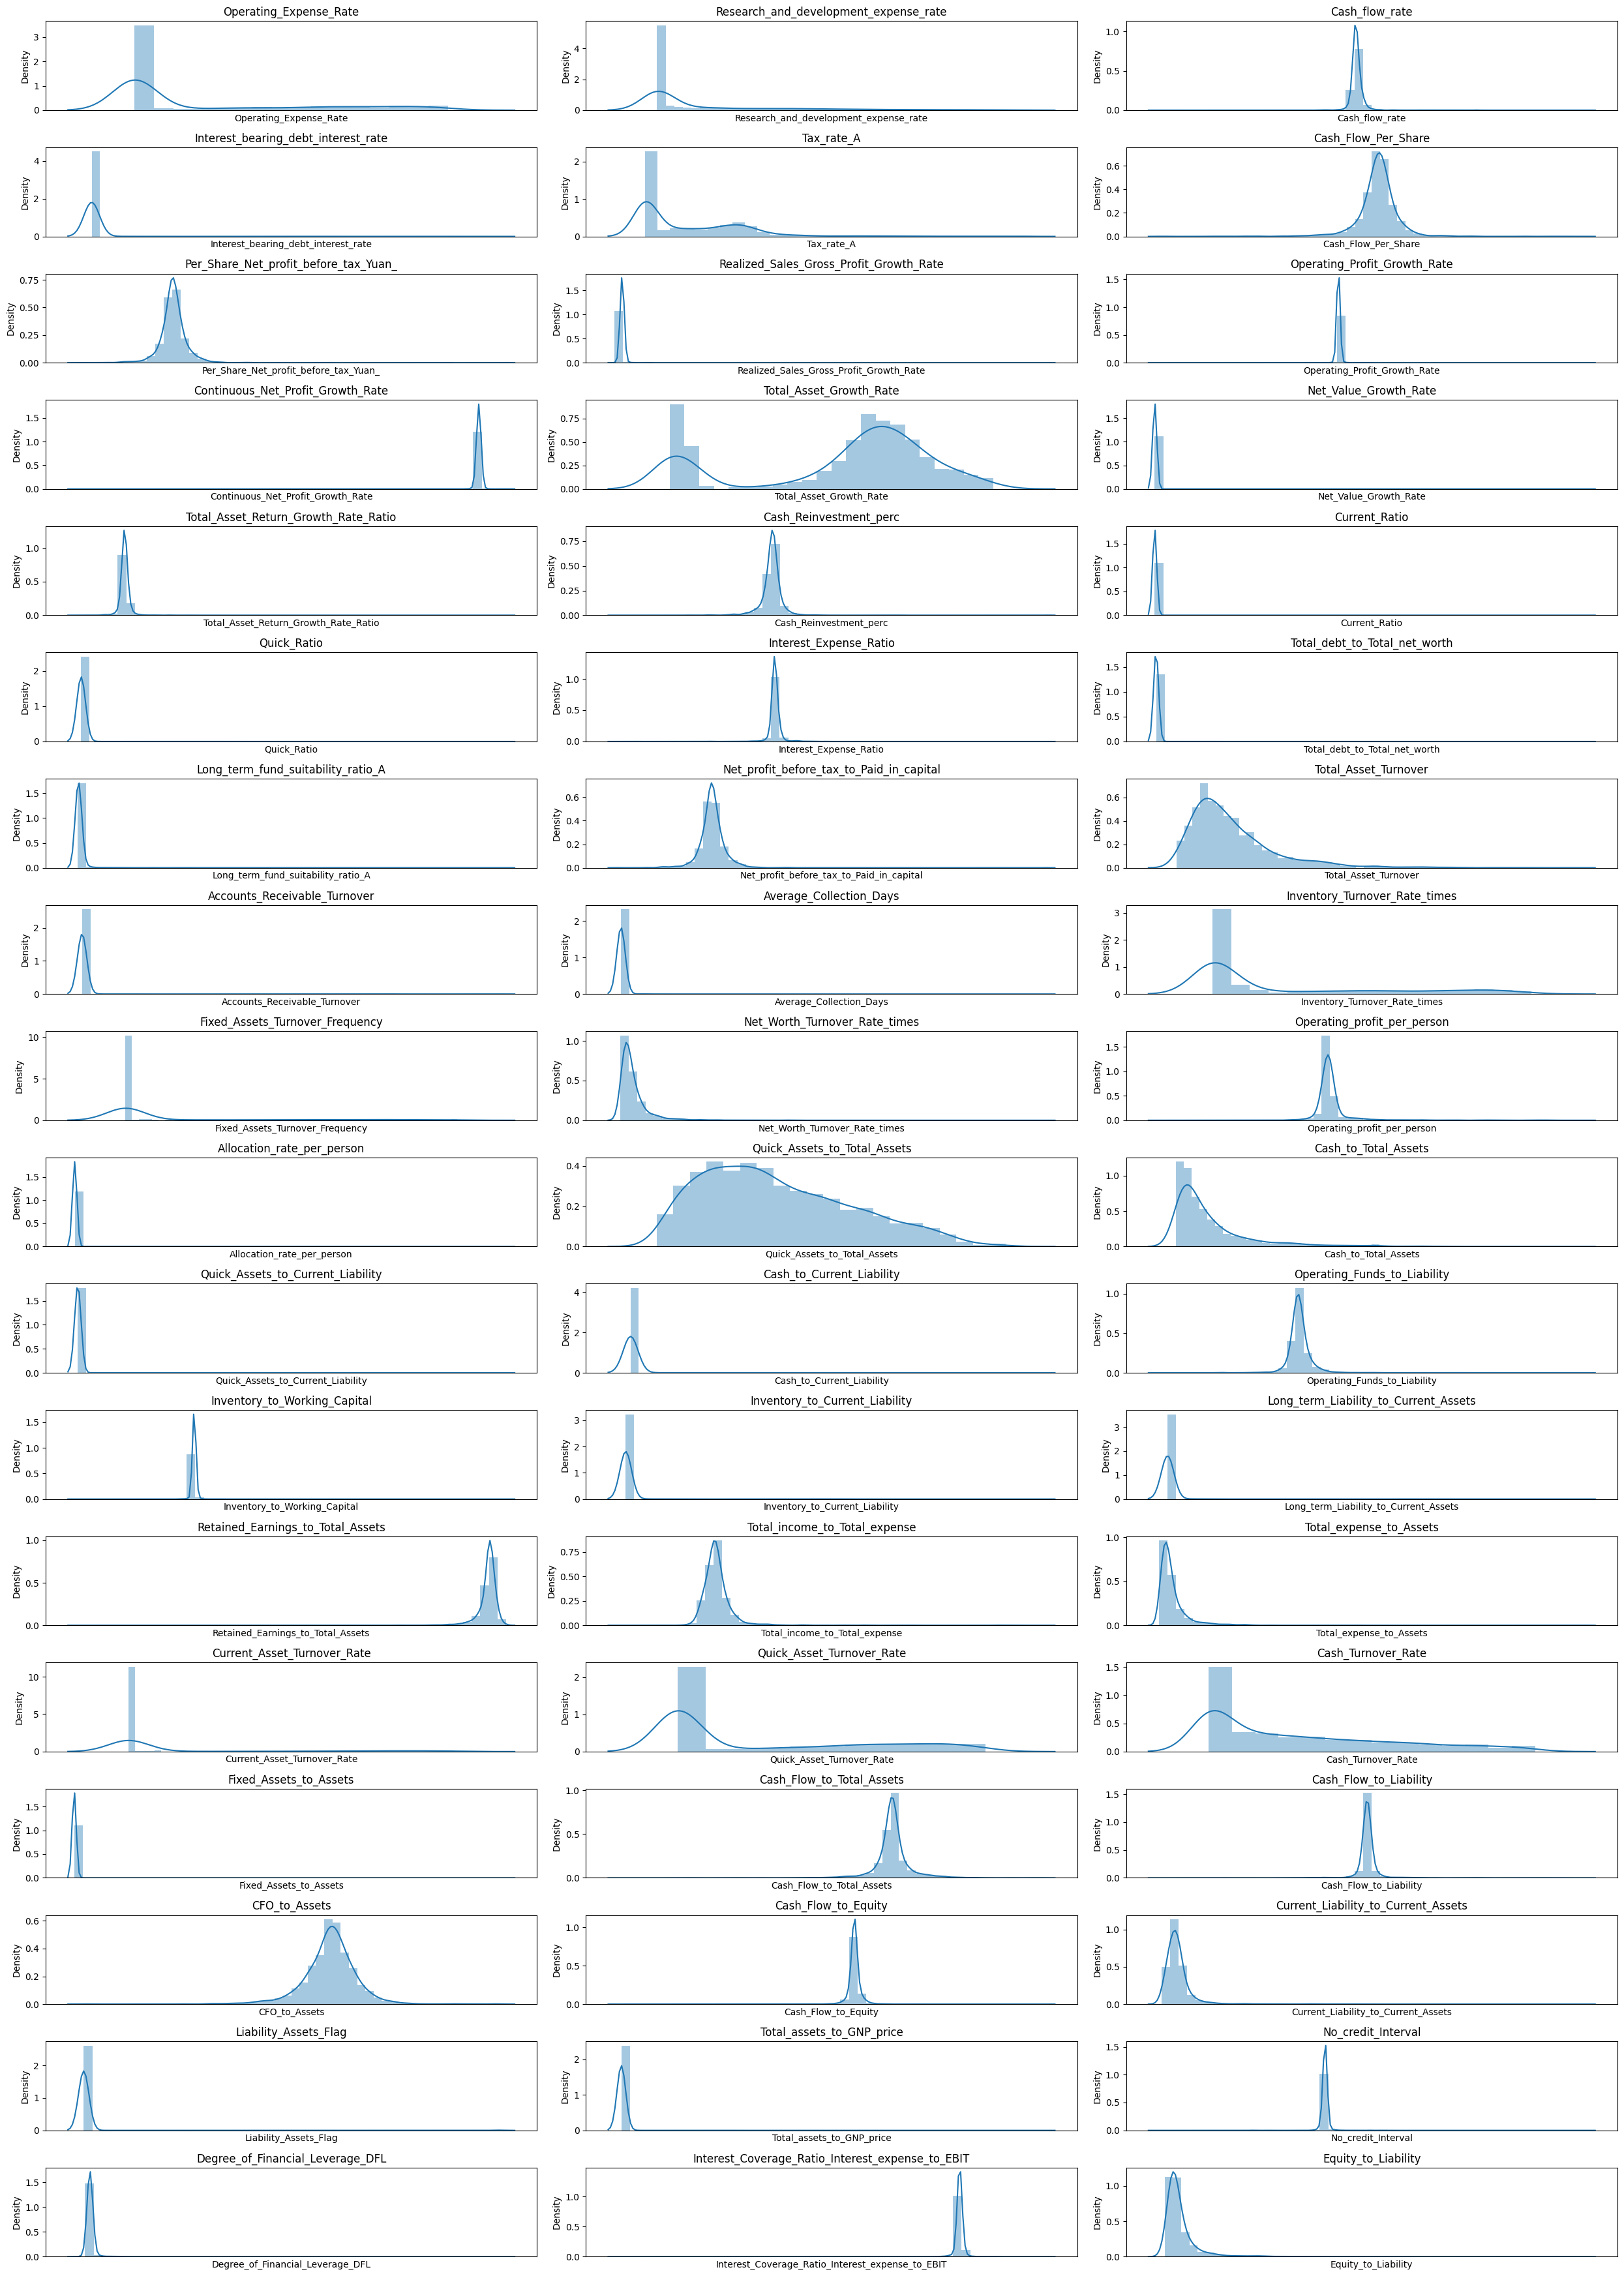

In [14]:
# Create box plots for all numerical features to detect outliers
# Calculate the number of rows and columns for subplots
num_features = len(numerical_features)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_features + num_cols - 1) // num_cols # Calculate number of rows dynamically

# Create box plots for all numerical features to detect outliers
plt.figure(figsize=(25, 35))  # Adjust figure size for better layout

for i, col in enumerate(numerical_features):
    plt.subplot(num_rows, num_cols, i + 1) # Use calculated num_rows
    sns.distplot(df_X[col])
    plt.title(col)
    plt.xticks([])  # Remove x-axis ticks for better visualization

plt.tight_layout()
plt.show()

In [15]:
# Counting Outliers per feature
Q1 = df_X.quantile(0.25)
Q3 = df_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

# Print number of Outliers per feature
print(((df_X > UL) | (df_X < LL)).sum())

Operating_Expense_Rate                                0
Research_and_development_expense_rate               264
Cash_flow_rate                                      206
Interest_bearing_debt_interest_rate                  94
Tax_rate_A                                           42
Cash_Flow_Per_Share                                 146
Per_Share_Net_profit_before_tax_Yuan_               186
Realized_Sales_Gross_Profit_Growth_Rate             283
Operating_Profit_Growth_Rate                        317
Continuous_Net_Profit_Growth_Rate                   340
Total_Asset_Growth_Rate                               0
Net_Value_Growth_Rate                               304
Total_Asset_Return_Growth_Rate_Ratio                226
Cash_Reinvestment_perc                              220
Current_Ratio                                       193
Quick_Ratio                                         190
Interest_Expense_Ratio                              328
Total_debt_to_Total_net_worth                   

In [16]:
# Print number of Outliers across the dataframe
print(((df_X > UL) | (df_X < LL)).sum().sum())

10864


In [17]:
# Detecting outliers for all numerical features and grouping them into "outlier_features"
outlier_features = []
for col in numerical_features:
    # Calculate Q1, Q3, and IQR
    q1 = df_X[col].quantile(0.25)
    q3 = df_X[col].quantile(0.75)
    iqr = q3 - q1

    # Define bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify outliers for the current feature
    outliers = df_X[(df_X[col] < lower_bound) | (df_X[col] > upper_bound)]

    # If there are outliers in the current feature, add it to the list
    if not outliers.empty:
        outlier_features.append(col)

print("Features with outliers:", outlier_features)

Features with outliers: ['Research_and_development_expense_rate', 'Cash_flow_rate', 'Interest_bearing_debt_interest_rate', 'Tax_rate_A', 'Cash_Flow_Per_Share', 'Per_Share_Net_profit_before_tax_Yuan_', 'Realized_Sales_Gross_Profit_Growth_Rate', 'Operating_Profit_Growth_Rate', 'Continuous_Net_Profit_Growth_Rate', 'Net_Value_Growth_Rate', 'Total_Asset_Return_Growth_Rate_Ratio', 'Cash_Reinvestment_perc', 'Current_Ratio', 'Quick_Ratio', 'Interest_Expense_Ratio', 'Total_debt_to_Total_net_worth', 'Long_term_fund_suitability_ratio_A', 'Net_profit_before_tax_to_Paid_in_capital', 'Total_Asset_Turnover', 'Accounts_Receivable_Turnover', 'Average_Collection_Days', 'Inventory_Turnover_Rate_times', 'Fixed_Assets_Turnover_Frequency', 'Net_Worth_Turnover_Rate_times', 'Operating_profit_per_person', 'Allocation_rate_per_person', 'Quick_Assets_to_Total_Assets', 'Cash_to_Total_Assets', 'Quick_Assets_to_Current_Liability', 'Cash_to_Current_Liability', 'Operating_Funds_to_Liability', 'Inventory_to_Working_Ca

**Mitigating Outliers in Numerical Data with Log1p Transformation**

Using the log1p transformation is a common technique to handle outliers in numerical features. This transformation applies the natural logarithm to the feature values after adding 1, which helps to reduce the impact of extreme values.

This transformation can help make the data more normally distributed, which is beneficial for many machine learning algorithms.

In [18]:
# Add the new Log1p transform feature on each outlier_feature and drop the corresponding original feature
for feature in outlier_features:
    # Apply log1p transformation to handle outliers
    df_X[feature + '_log1p'] = np.log1p(df_X[feature])
    # Drop the original feature
    df_X.drop(feature, axis=1, inplace=True)

In [19]:
# Capture all the features ending with suffix "_log1p"
outlier_features_log1p = [col for col in df_X.columns if col.endswith('_log1p')]

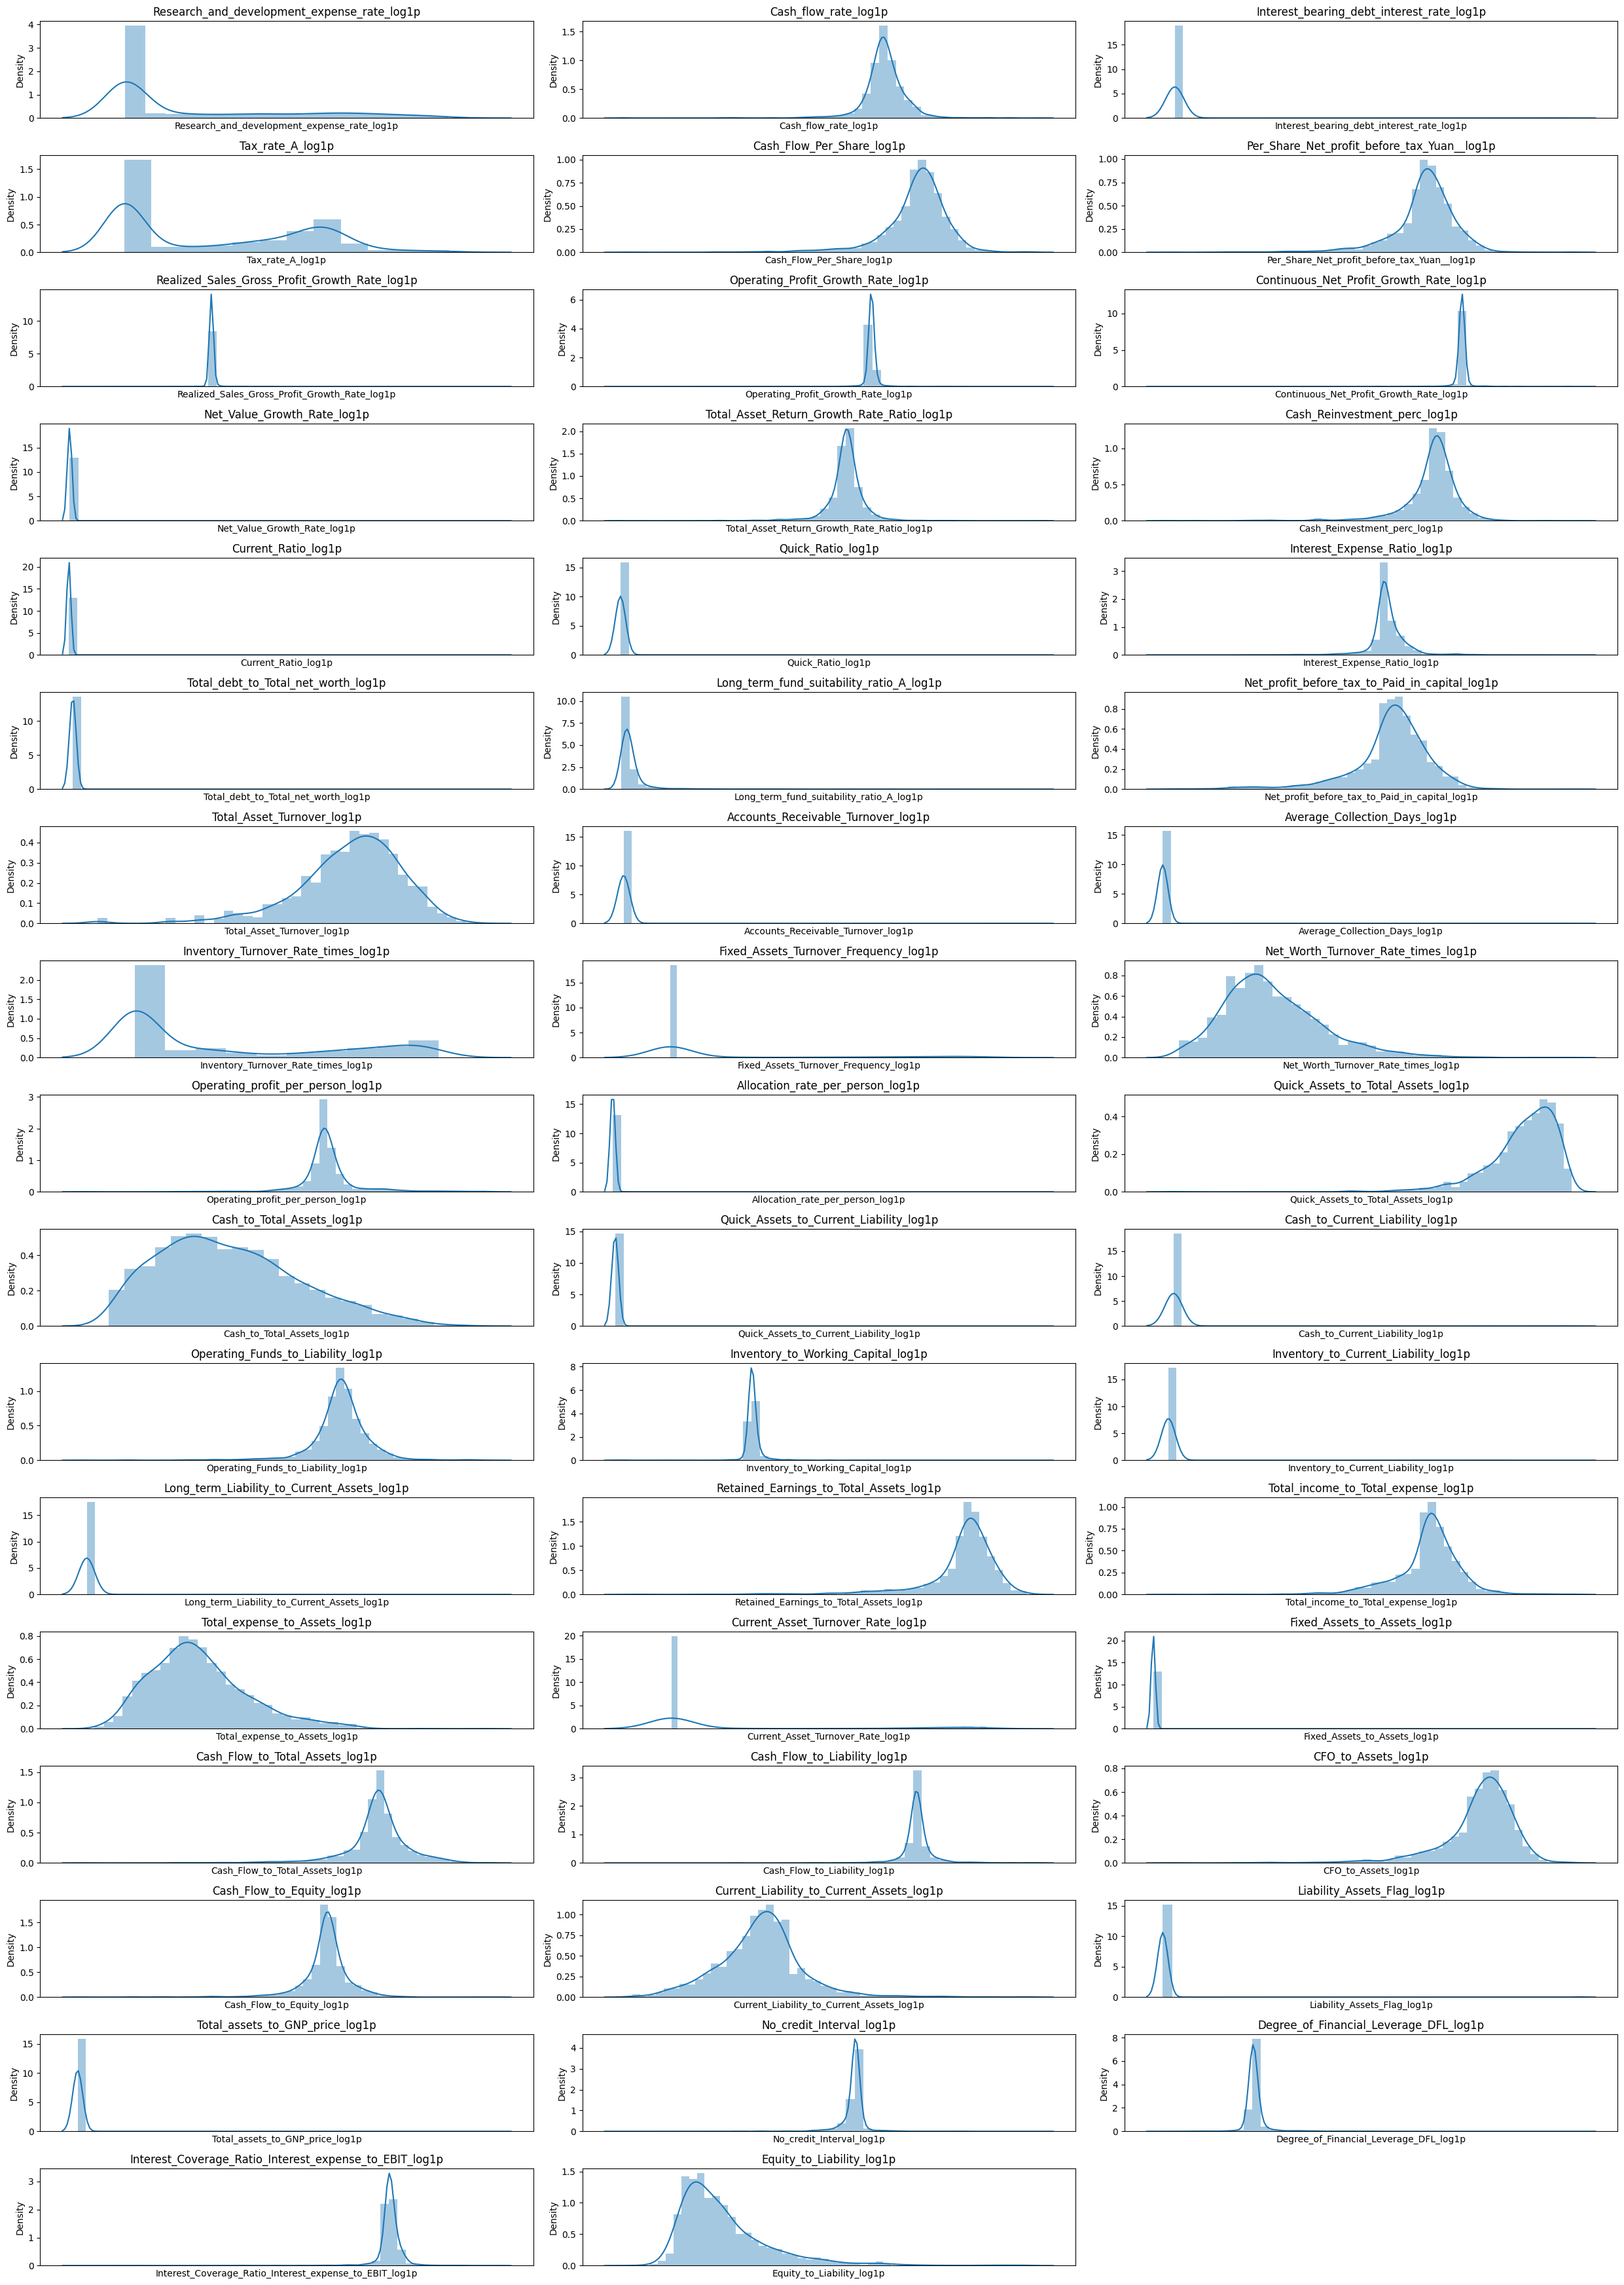

In [20]:
# Calculate the number of rows and columns for subplots
out_features = len(outlier_features_log1p)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (out_features + num_cols - 1) // num_cols # Calculate number of rows dynamically

plt.figure(figsize=(25, 35))

for i, col in enumerate(outlier_features_log1p):
    plt.subplot(num_rows, num_cols, i + 1) # Use calculated num_rows
    sns.distplot(df_X[col])
    plt.title(col)
    plt.xticks([])  # Remove x-axis ticks for better visualization

plt.tight_layout()
plt.show()

In [21]:
# Counting Outliers per feature
Q1 = df_X.quantile(0.25)
Q3 = df_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

# Print number of Outliers per feature
print(((df_X > UL) | (df_X < LL)).sum())

Operating_Expense_Rate                                      0
Total_Asset_Growth_Rate                                     0
Quick_Asset_Turnover_Rate                                   0
Cash_Turnover_Rate                                          0
Research_and_development_expense_rate_log1p                 6
Cash_flow_rate_log1p                                      136
Interest_bearing_debt_interest_rate_log1p                  94
Tax_rate_A_log1p                                            0
Cash_Flow_Per_Share_log1p                                 111
Per_Share_Net_profit_before_tax_Yuan__log1p               160
Realized_Sales_Gross_Profit_Growth_Rate_log1p             282
Operating_Profit_Growth_Rate_log1p                        312
Continuous_Net_Profit_Growth_Rate_log1p                   334
Net_Value_Growth_Rate_log1p                               304
Total_Asset_Return_Growth_Rate_Ratio_log1p                193
Cash_Reinvestment_perc_log1p                              159
Current_

In [22]:
# Print number of Outliers across the dataframe
print(((df_X > UL) | (df_X < LL)).sum().sum())

9557


The Log1p transformation has reduced the number of outliers compared to the original data frame (9557 Outlier values against 10864). Therefore, we will use the Log1p transformed data frame.

In [23]:
# Consider using Winsorizing 'df_X' instead of replacing with NaN.
# Winsorizing is particularly useful in financial data analysis, where extreme values can significantly impact metrics and models.

# Instead of replacing outliers with NaN, Winsorize them
from scipy.stats.mstats import winsorize

for col in df_X.columns:
    df_X[col] = winsorize(df_X[col], limits=[0.05, 0.05]) # Winsorize top and bottom 5%


In [24]:
# Counting Outliers per feature
Q1 = df_X.quantile(0.25)
Q3 = df_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

# Print number of Outliers per feature
print(((df_X > UL) | (df_X < LL)).sum())

Operating_Expense_Rate                                      0
Total_Asset_Growth_Rate                                     0
Quick_Asset_Turnover_Rate                                   0
Cash_Turnover_Rate                                          0
Research_and_development_expense_rate_log1p                 0
Cash_flow_rate_log1p                                        0
Interest_bearing_debt_interest_rate_log1p                   0
Tax_rate_A_log1p                                            0
Cash_Flow_Per_Share_log1p                                  18
Per_Share_Net_profit_before_tax_Yuan__log1p               160
Realized_Sales_Gross_Profit_Growth_Rate_log1p             206
Operating_Profit_Growth_Rate_log1p                        317
Continuous_Net_Profit_Growth_Rate_log1p                   340
Net_Value_Growth_Rate_log1p                               208
Total_Asset_Return_Growth_Rate_Ratio_log1p                218
Cash_Reinvestment_perc_log1p                              159
Current_

In [25]:
# Print number of Outliers across the dataframe
print(((df_X > UL) | (df_X < LL)).sum().sum())

8641


Winsorizing top and bottom 5% of 'df_X' has even reduced the number of outliers compared to the Log1p transformed data frame (8641 Outlier values against 9557). Therefore, we will use the Winsorized Log1p transformed data frame moving forward.

#### Missing Value Detection and Handling

In [26]:
# Checking for Missing Values
print(df_X.isnull().sum())

Operating_Expense_Rate                                      0
Total_Asset_Growth_Rate                                     0
Quick_Asset_Turnover_Rate                                   0
Cash_Turnover_Rate                                          0
Research_and_development_expense_rate_log1p                 0
Cash_flow_rate_log1p                                        0
Interest_bearing_debt_interest_rate_log1p                   0
Tax_rate_A_log1p                                            0
Cash_Flow_Per_Share_log1p                                 319
Per_Share_Net_profit_before_tax_Yuan__log1p               137
Realized_Sales_Gross_Profit_Growth_Rate_log1p               0
Operating_Profit_Growth_Rate_log1p                          0
Continuous_Net_Profit_Growth_Rate_log1p                     0
Net_Value_Growth_Rate_log1p                                 0
Total_Asset_Return_Growth_Rate_Ratio_log1p                  0
Cash_Reinvestment_perc_log1p                              145
Current_

In [27]:
# Provide a quick overview of the extent of missing data in each column of the combined dataset,
# helping to identify features with a large proportion of missing values.
# This information is crucial for data preprocessing and missing value imputation strategies.
# Often features with a very high proportion of missing values may be removed altogether, while others may be imputed using methods like mean/median imputation,
# or more advanced techniques depending on the nature of the data and the relationship to other features.

df_concat = pd.concat([df_X, df_Y], axis =1)
df_concat.isnull().sum().sort_values(ascending = False) / len(df_concat)

,0
Quick_Assets_to_Total_Assets_log1p,0.17
Cash_Flow_Per_Share_log1p,0.16
CFO_to_Assets_log1p,0.11
Net_profit_before_tax_to_Paid_in_capital_log1p,0.08
Cash_Reinvestment_perc_log1p,0.07
Retained_Earnings_to_Total_Assets_log1p,0.07
Per_Share_Net_profit_before_tax_Yuan__log1p,0.07
Total_Asset_Turnover_log1p,0.07
Cash_Flow_to_Total_Assets_log1p,0.07
Research_and_development_expense_rate_log1p,0.00


In [28]:
# Drop features with more than 10% missing values

# Calculate the percentage of missing values for each feature
missing_percentage = df_concat.isnull().sum() / len(df_concat)

# Identify features with more than 10% missing values
features_to_drop = missing_percentage[missing_percentage > 0.1].index

# Drop the identified features from the DataFrame
df_concat = df_concat.drop(columns=features_to_drop)

In [29]:
# Feature to drop
print(features_to_drop)

Index(['Cash_Flow_Per_Share_log1p', 'Quick_Assets_to_Total_Assets_log1p',
       'CFO_to_Assets_log1p'],
      dtype='object')


In [30]:
# Use KNN imputer to impute missing values in 'df_concat'

# Create a KNN imputer object
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Fit and transform the imputer on the DataFrame
df_concat_imputed = pd.DataFrame(imputer.fit_transform(df_concat), columns = df_concat.columns)

In [31]:
# Checking for Missing Values
print(df_concat_imputed.isnull().sum())

Operating_Expense_Rate                                    0
Total_Asset_Growth_Rate                                   0
Quick_Asset_Turnover_Rate                                 0
Cash_Turnover_Rate                                        0
Research_and_development_expense_rate_log1p               0
Cash_flow_rate_log1p                                      0
Interest_bearing_debt_interest_rate_log1p                 0
Tax_rate_A_log1p                                          0
Per_Share_Net_profit_before_tax_Yuan__log1p               0
Realized_Sales_Gross_Profit_Growth_Rate_log1p             0
Operating_Profit_Growth_Rate_log1p                        0
Continuous_Net_Profit_Growth_Rate_log1p                   0
Net_Value_Growth_Rate_log1p                               0
Total_Asset_Return_Growth_Rate_Ratio_log1p                0
Cash_Reinvestment_perc_log1p                              0
Current_Ratio_log1p                                       0
Quick_Ratio_log1p                       

In [32]:
df_concat_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 52 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Operating_Expense_Rate                                  2058 non-null   float64
 1   Total_Asset_Growth_Rate                                 2058 non-null   float64
 2   Quick_Asset_Turnover_Rate                               2058 non-null   float64
 3   Cash_Turnover_Rate                                      2058 non-null   float64
 4   Research_and_development_expense_rate_log1p             2058 non-null   float64
 5   Cash_flow_rate_log1p                                    2058 non-null   float64
 6   Interest_bearing_debt_interest_rate_log1p               2058 non-null   float64
 7   Tax_rate_A_log1p                                        2058 non-null   float64
 8   Per_Share_Net_profit_before_tax_Yuan__

In [33]:
# Check the basic measures of descriptive statistics for the continuous variables
df_concat_imputed.describe().T

,count,mean,std,min,25%,50%,75%,max
Operating_Expense_Rate,2058.00,-0.01,0.98,-0.63,-0.63,-0.63,0.63,2.13
Total_Asset_Growth_Rate,2058.00,-0.01,0.99,-1.82,-0.33,0.32,0.66,1.27
Quick_Asset_Turnover_Rate,2058.00,-0.01,0.99,-0.74,-0.74,-0.74,0.93,1.91
Cash_Turnover_Rate,2058.00,-0.01,0.97,-0.94,-0.94,-0.33,0.67,2.06
Research_and_development_expense_rate_log1p,2058.00,-0.34,0.71,-0.83,-0.83,-0.83,0.15,1.21
Cash_flow_rate_log1p,2058.00,-0.04,0.33,-0.67,-0.24,-0.07,0.15,0.66
Interest_bearing_debt_interest_rate_log1p,2058.00,-0.13,0.00,-0.13,-0.13,-0.13,-0.13,-0.13
Tax_rate_A_log1p,2058.00,-0.48,0.93,-1.40,-1.40,-0.71,0.51,0.91
Per_Share_Net_profit_before_tax_Yuan__log1p,2058.00,-0.08,0.56,-1.22,-0.39,-0.04,0.26,3.06
Realized_Sales_Gross_Profit_Growth_Rate_log1p,2058.00,-0.03,0.01,-0.04,-0.03,-0.03,-0.03,-0.01


In [34]:
df_concat_imputed.shape

(2058, 52)

#### Univariate Analysis

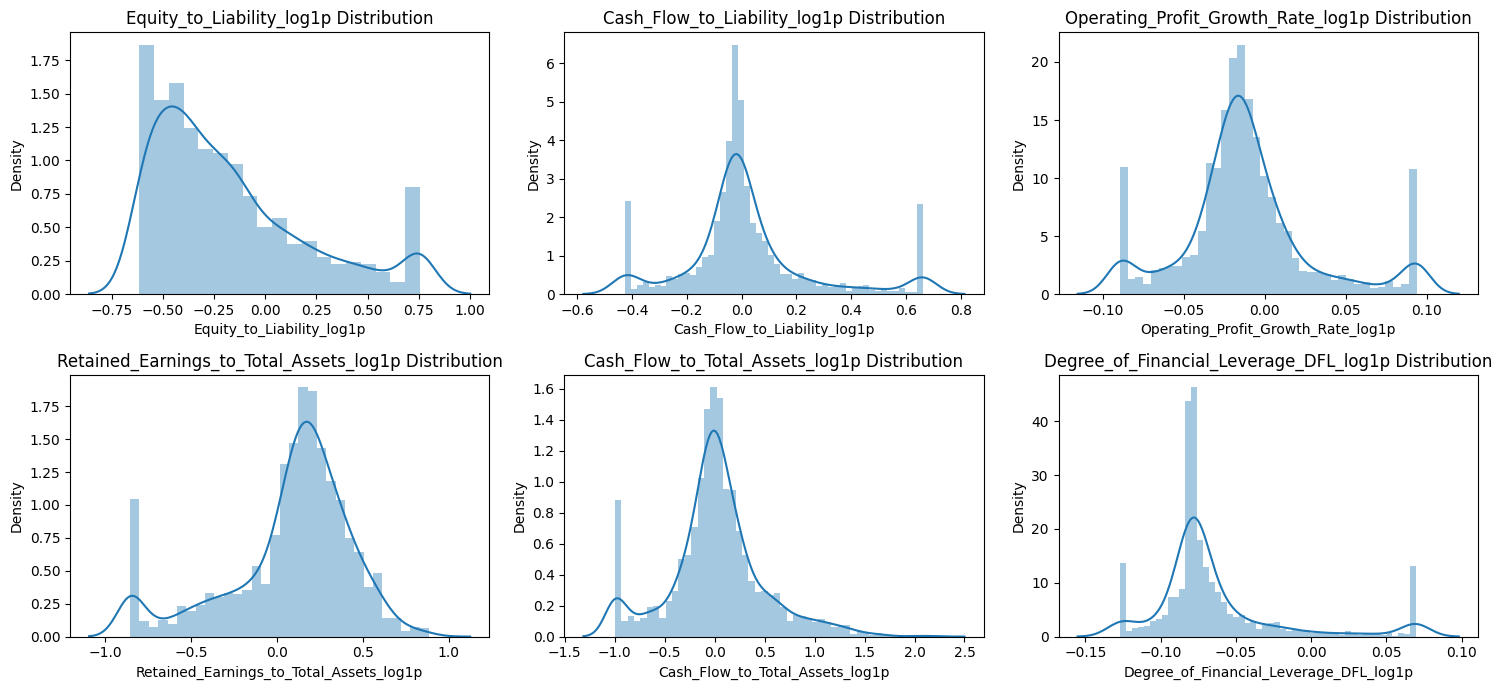

In [35]:
# We take only the top6 most significant features based on Logistic Regression Model (The model will be run in the subsequent sections)
# We perform on these features univariate analysis with proper interpretation

features_to_plot = [
    'Equity_to_Liability_log1p',
    'Cash_Flow_to_Liability_log1p',
    'Operating_Profit_Growth_Rate_log1p',
    'Retained_Earnings_to_Total_Assets_log1p',
    'Cash_Flow_to_Total_Assets_log1p',
    'Degree_of_Financial_Leverage_DFL_log1p'
]

plt.figure(figsize=(15, 7))

for i, col in enumerate(features_to_plot):
  plt.subplot(2, 3, i + 1)
  sns.distplot(df_concat_imputed[col])
  plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()

In [36]:
for col in features_to_plot:
    # Calculate descriptive statistics
    mean = df_concat_imputed[col].mean()
    median = df_concat_imputed[col].median()
    std_dev = df_concat_imputed[col].std()
    min_val = df_concat_imputed[col].min()
    max_val = df_concat_imputed[col].max()
    skewness = df_concat_imputed[col].skew()

    print(f"Distribution parameters for {col}:")
    print(f"  Mean: {mean:.2f}")
    print(f"  Median: {median:.2f}")
    print(f"  Standard Deviation: {std_dev:.2f}")
    print(f"  Minimum: {min_val:.2f}")
    print(f"  Maximum: {max_val:.2f}")
    print(f"  Skewness: {skewness:.2f}")
    print("-" * 20) #separator for each feature

Distribution parameters for Equity_to_Liability_log1p:
  Mean: -0.17
  Median: -0.27
  Standard Deviation: 0.38
  Minimum: -0.62
  Maximum: 0.76
  Skewness: 1.03
--------------------
Distribution parameters for Cash_Flow_to_Liability_log1p:
  Mean: 0.02
  Median: -0.02
  Standard Deviation: 0.23
  Minimum: -0.43
  Maximum: 0.66
  Skewness: 0.97
--------------------
Distribution parameters for Operating_Profit_Growth_Rate_log1p:
  Mean: -0.01
  Median: -0.02
  Standard Deviation: 0.04
  Minimum: -0.09
  Maximum: 0.09
  Skewness: 0.71
--------------------
Distribution parameters for Retained_Earnings_to_Total_Assets_log1p:
  Mean: 0.07
  Median: 0.15
  Standard Deviation: 0.37
  Minimum: -0.85
  Maximum: 0.89
  Skewness: -0.97
--------------------
Distribution parameters for Cash_Flow_to_Total_Assets_log1p:
  Mean: 0.02
  Median: 0.00
  Standard Deviation: 0.48
  Minimum: -1.00
  Maximum: 2.19
  Skewness: 0.33
--------------------
Distribution parameters for Degree_of_Financial_Leverage_

**Univariate Analysis and Interpretations:**

Let's break down and interpret each of these distribution parameters:

**Equity_to_Liability_log1p**
- Mean: -0.17: On average, the equity to liability ratio is slightly negative, indicating that liabilities generally exceed equity.
- Median: -0.27: The middle value is lower than the mean, suggesting that half of the values are below this point.
- Standard Deviation: 0.38: The values are spread out around the mean, indicating moderate variability.
- Minimum: -0.62: The lowest value shows that in some cases, liabilities significantly exceed equity.
- Maximum: 0.76: The highest value indicates that equity can exceed liabilities by a good margin.
- Skewness: 1.03: The distribution is skewed to the right, meaning there are more values on the lower side.

**Cash_Flow_to_Liability_log1p**
- Mean: 0.02: On average, the cash flow to liability ratio is slightly positive, indicating that cash flow generally covers liabilities.
- Median: -0.02: The middle value is slightly negative, suggesting that half of the values are below this point.
- Standard Deviation: 0.23: The values are relatively close to the mean, indicating low variability.
- Minimum: -0.43: The lowest value shows that in some cases, liabilities exceed cash flow significantly.
- Maximum: 0.66: The highest value indicates that cash flow can cover liabilities by a good margin.
- Skewness: 0.97: The distribution is skewed to the right, meaning there are more values on the lower side.

**Operating_Profit_Growth_Rate_log1p**
- Mean: -0.01: On average, the operating profit growth rate is slightly negative, indicating a small decline in operating profit.
- Median: -0.02: The middle value is slightly lower than the mean, suggesting that half of the values are below this point.
- Standard Deviation: 0.04: The values are relatively close to the mean, indicating low variability.
- Minimum: -0.09: The lowest value shows a significant decline in operating profit.
- Maximum: 0.09: The highest value indicates a good growth in operating profit.
- Skewness: 0.71: The distribution is moderately skewed to the right, meaning there are more values on the higher side.

**Retained_Earnings_to_Total_Assets_log1p**
- Mean: 0.07: On average, the retained earnings to total assets ratio is slightly positive, indicating that retained earnings generally contribute positively to total assets.
- Median: 0.15: The middle value is higher than the mean, suggesting that half of the values are above this point.
- Standard Deviation: 0.37: The values are spread out around the mean, indicating moderate variability.
- Minimum: -0.85: The lowest value shows a significant negative contribution of retained earnings to total assets.
- Maximum: 0.89: The highest value indicates a good positive contribution of retained earnings to total assets.
- Skewness: -0.97: The distribution is skewed to the left, meaning there are more values on the higher side.

**Cash_Flow_to_Total_Assets_log1p**
- Mean: 0.02: On average, the cash flow to total assets ratio is slightly positive, indicating that cash flow generally contributes positively to total assets.
- Median: 0.00: The middle value is zero, suggesting a balanced distribution.
Standard Deviation: 0.48: The values are spread out around the mean, indicating high variability.
- Minimum: -1.00: The lowest value shows a significant negative contribution of cash flow to total assets.
- Maximum: 2.19: The highest value indicates a good positive contribution of cash flow to total assets.
- Skewness: 0.33: The distribution is slightly skewed to the right, meaning there are more values on the higher side.

**Degree_of_Financial_Leverage_DFL_log1p**
- Mean: -0.06: On average, the degree of financial leverage is slightly negative, indicating a small negative impact of financial leverage.
- Median: -0.08: The middle value is lower than the mean, suggesting that half of the values are below this point.
- Standard Deviation: 0.04: The values are relatively close to the mean, indicating low variability.
- Minimum: -0.13: The lowest value shows a significant negative impact of financial leverage.
- Maximum: 0.07: The highest value indicates a small positive impact of financial leverage.
- Skewness: 1.79: The distribution is strongly skewed to the right, meaning there are more values on the lower side.

These interpretations provide insights into the financial health and performance of the companies based on the given ratios.

**Key Insights**

**Profitability:**
- Mixed signals regarding profitability. While some metrics indicate financial stress (e.g., negative `Operating_Profit_Growth_Rate_log1p`), others show positive contributions (e.g., `Retained_Earnings_to_Total_Assets_log1p`).

**Leverage and Risk:**
- The `Equity_to_Liability_log1p` suggests potential leverage and financial risk, but there are instances where equity exceeds liabilities, indicating some financial stability.

**Liquidity:**
- The `Cash_Flow_to_Total_Assets_log1p` ratio indicates good liquidity, suggesting that entities can meet their short-term obligations.

Overall, while there are areas of concern, such as profitability and leverage, there are also positive aspects like liquidity and instances of cash flow covering liabilities. These insights can help in making informed decisions regarding financial management and strategy.

#### Bivariate Analysis

In [37]:
df_concat_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 52 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Operating_Expense_Rate                                  2058 non-null   float64
 1   Total_Asset_Growth_Rate                                 2058 non-null   float64
 2   Quick_Asset_Turnover_Rate                               2058 non-null   float64
 3   Cash_Turnover_Rate                                      2058 non-null   float64
 4   Research_and_development_expense_rate_log1p             2058 non-null   float64
 5   Cash_flow_rate_log1p                                    2058 non-null   float64
 6   Interest_bearing_debt_interest_rate_log1p               2058 non-null   float64
 7   Tax_rate_A_log1p                                        2058 non-null   float64
 8   Per_Share_Net_profit_before_tax_Yuan__

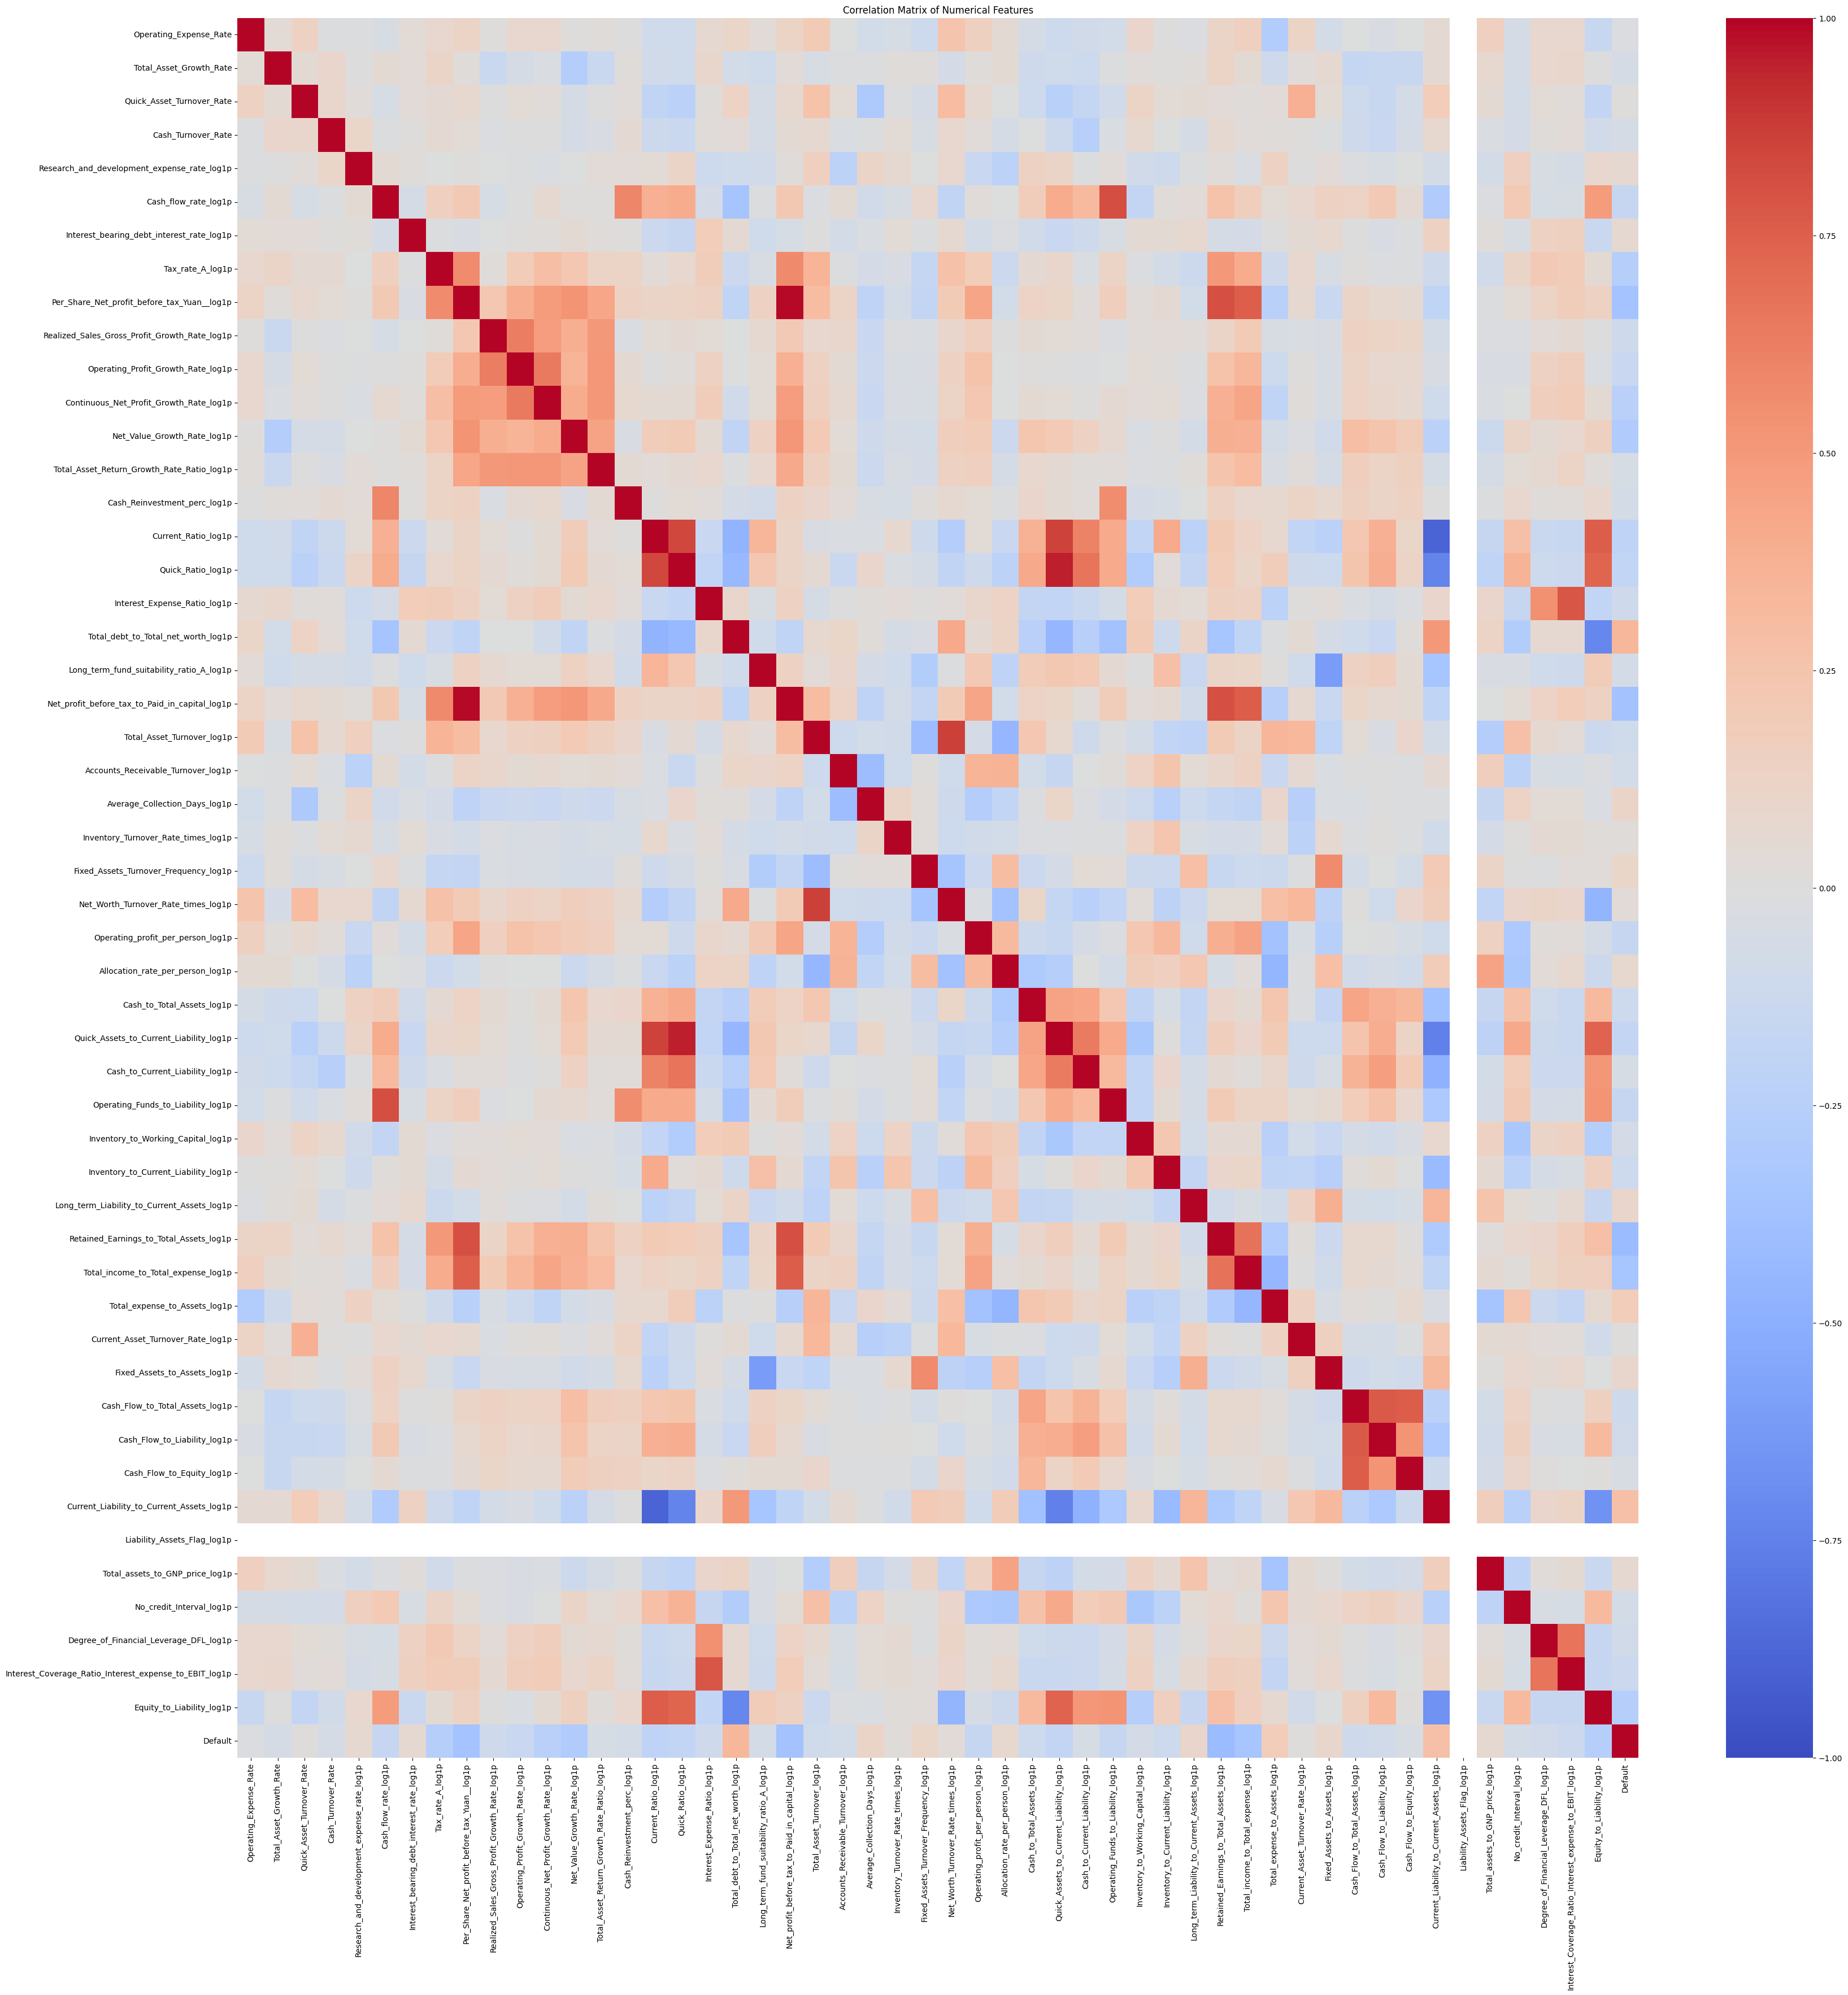

In [38]:
# Inspect possible correlations between independent variables
# Calculate correlation matrix from 'df_concat_imputed' excluding 'Default'
cor_matrix = df_concat_imputed.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(40, 40))
sns.heatmap(cor_matrix, cmap='coolwarm', fmt=".2f", vmin = -1, vmax= 1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

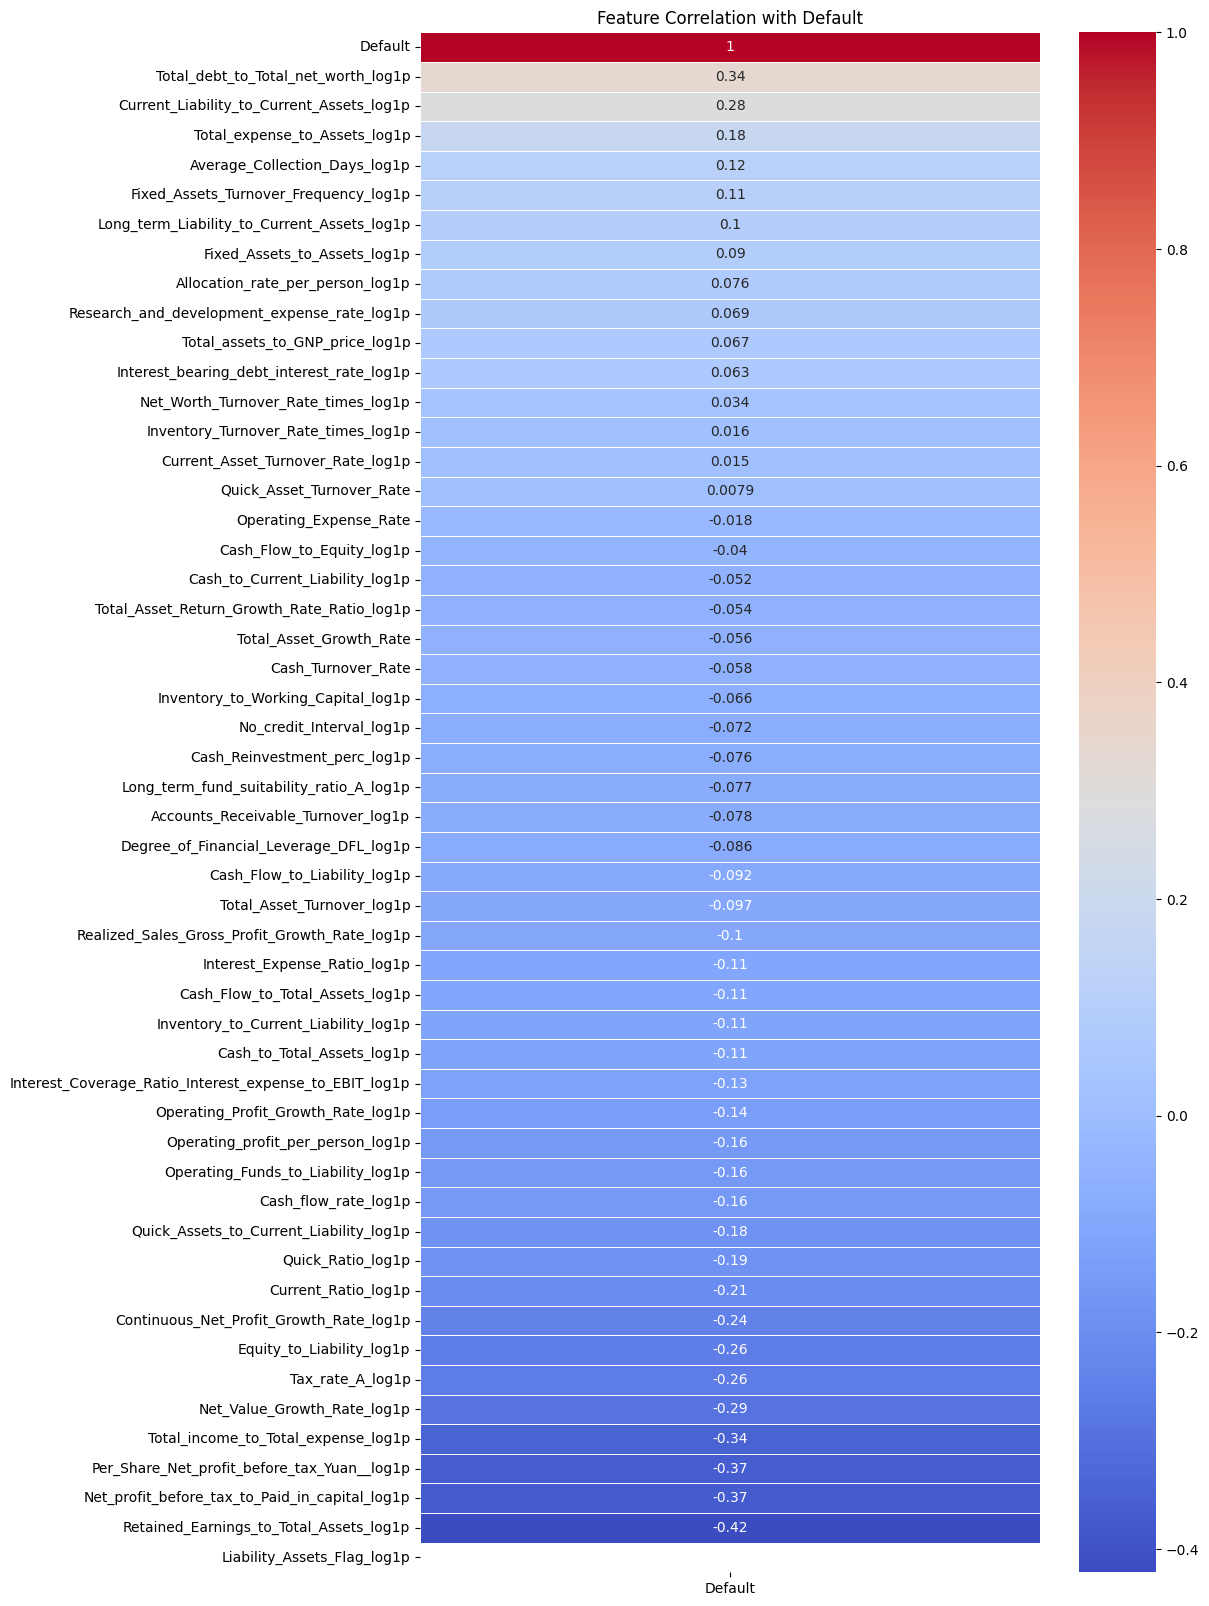

In [39]:
# Display heatmap of correlations with 'Default'
plt.figure(figsize=(10, 20))
sns.heatmap(cor_matrix[['Default']].sort_values(by='Default', ascending=False), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation with Default")
plt.show()

Let's interpret the correlation of various financial metrics with 'Default'. We focus on the most influential predictors of default, both positively and negatively:

**Most Influential Positive Predictors of Default**

- **Total_debt_to_Total_net_worth_log1p (0.34):**

  Higher total debt relative to net worth is moderately associated with a higher likelihood of default. This indicates that companies with higher leverage are more prone to default.

- **Current_Liability_to_Current_Assets_log1p (0.28):**

  Higher current liabilities relative to current assets are moderately associated with a higher likelihood of default. This suggests liquidity issues, where companies struggle to meet short-term obligations.

**Most Influential Negative Predictors of Default**

- **Retained_Earnings_to_Total_Assets_log1p (-0.42):**

  Higher retained earnings relative to total assets are moderately associated with a lower likelihood of default. This suggests that profitable companies with higher retained earnings are less likely to default.

- **Net_profit_before_tax_to_Paid_in_capital_log1p (-0.37):**

  Higher net profit before tax relative to paid-in capital is moderately associated with a lower likelihood of default. This indicates that more profitable companies are less likely to default.

These predictors provide key insights into the factors that significantly influence the likelihood of default. Higher leverage and liquidity issues increase the risk, while higher profitability and retained earnings decrease it.

In [40]:
# Other bivariate analysis of 'df_concat_imputed', and interpretation of the pairplots

# Select features for pairplot (you can customize this list)
features_for_pairplot = [
                        'Equity_to_Liability_log1p',
                        'Cash_Flow_to_Liability_log1p',
                        'Operating_Profit_Growth_Rate_log1p',
                        'Retained_Earnings_to_Total_Assets_log1p',
                        'Cash_Flow_to_Total_Assets_log1p',
                        'Degree_of_Financial_Leverage_DFL_log1p',
                        'Default'
                        ]

# Create the pairplot
sns.pairplot(df_concat_imputed[features_for_pairplot], hue='Default')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

The pairplot visualizes the relationships between pairs of selected features, colored by the 'Default' status. Here's how to interpret it:

- **Histograms on the diagonal:** Each histogram shows the distribution of a single feature for both defaulting and non-defaulting companies. When comparing the shapes and locations of the distributions, a significant difference indicates that the feature is a good predictor. For example, we see the distribution of `Equity_to_Liability_log1p` is shifted noticeably to the left for defaulting companies, this suggests that lower equity-to-liability ratio are associated with a higher default probability.

- **Scatterplots off the diagonal:** Each scatterplot displays the relationship between two different features. The points are colored by the 'Default' status. When looking for patterns or clusters of defaulting companies within the scatterplots, a clear separation of defaulting and non-defaulting companies in a particular scatterplot suggests a strong relationship between those two features in predicting defaults.

- **Example Interpretations (based on general financial principles):**
  - `Equity_to_Liability_log1p` vs. `Cash_Flow_to_Liability_log1p`:  A cluster of defaulting companies with low equity-to-liability ratios and low cash flow to liability ratios might indicate a lack of financial stability and insufficient cash flow to meet obligations.
  - `Operating_Profit_Growth_Rate_log1p` vs. `Retained_Earnings_to_Total_Assets_log1p`: Companies with consistently negative or low operating profit growth and low retained earnings might be more prone to default.
  - `Cash_Flow_to_Total_Assets_log1p` vs. `Degree_of_Financial_Leverage_DFL_log1p`: High financial leverage combined with low cash flow to total assets could signal a higher risk of default.

**Overall observations:** The pairplot allows for a visual exploration of relationships between financial features and default status.  Features showing clear separation or distinct clusters of defaulting companies are likely to be strong predictors in a predictive model.

Pay close attention to where the colors (default vs. non-default) separate or cluster in the scatter plots. The more distinct the separation, the more predictive the combination of those features.

### Step 3: Models Comparison

#### Data Preparation

In [41]:
# Segregate the predictors and response
X = df_concat_imputed.drop(['Default'], axis=1)
y = df_concat_imputed['Default']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=df['Default'])

# Statsmodel requires the labelled data, therefore, concatenating the y label to the train set.
Default_train = pd.concat([X_train, y_train], axis=1)
Default_test = pd.concat([X_test, y_test], axis=1)

In [42]:
# Calculate class proportions
class_proportions = y_train.value_counts(normalize=True)
print(class_proportions)

Default
0.00   0.89
1.00   0.11
Name: proportion, dtype: float64


In [43]:
# Check for and drop highly correlated features

# Prepare the training data (`X_train`) for use with a model from `statsmodels`, which requires this explicit addition of a constant.
# The resulting `X_train_sm` is then used in subsequent model fitting steps.
X_train_sm = sm.add_constant(X_train)

# Calculate correlation matrix
corr_matrix = X_train_sm.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.87
to_drop = [column for column in upper.columns if any(upper[column] > 0.87)]

# Drop features
X_train_sm = X_train_sm.drop(columns=to_drop)
# Drop from test set as well
X_test_sm = sm.add_constant(X_test.drop(columns=to_drop))

In [44]:
# Highly correlated features dropped
print(to_drop)

['Net_profit_before_tax_to_Paid_in_capital_log1p', 'Quick_Assets_to_Current_Liability_log1p', 'Current_Liability_to_Current_Assets_log1p']


In [45]:
X_train_sm.shape

(1378, 48)

#### Logistic Regression Model

In [46]:
# Logistic Regression Classification Report for both Train and Test

# Initialize and train the Logistic Regression model, and use class_weight='balanced' to address class imbalance
logreg_balanced = LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear') # Use a solver that works well for smaller datasets
logreg_balanced.fit(X_train_sm, y_train)

# Predict on train and test sets
y_pred_train = logreg_balanced.predict(X_train_sm)
y_pred_test = logreg_balanced.predict(X_test_sm)

# Generate classification reports
print("Logistic Regression Classification Report using class_weight='balanced' to address class imbalance (Train):\n", classification_report(y_train, y_pred_train))
print("\nLogistic Regression Classification Report using class_weight='balanced' to address class imbalance (Test):\n", classification_report(y_test, y_pred_test))

Logistic Regression Classification Report using class_weight='balanced' to address class imbalance (Train):
               precision    recall  f1-score   support

         0.0       0.98      0.83      0.90      1231
         1.0       0.37      0.86      0.52       147

    accuracy                           0.83      1378
   macro avg       0.68      0.84      0.71      1378
weighted avg       0.91      0.83      0.86      1378


Logistic Regression Classification Report using class_weight='balanced' to address class imbalance (Test):
               precision    recall  f1-score   support

         0.0       0.97      0.86      0.91       607
         1.0       0.40      0.81      0.54        73

    accuracy                           0.85       680
   macro avg       0.69      0.83      0.73       680
weighted avg       0.91      0.85      0.87       680



In [47]:
# Oversample minority class using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_sm, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test_sm, y_test)

In [48]:
# Initialize and train the Logistic Regression model, and use SMOTE to address class imbalance
logreg_os = LogisticRegression(random_state=42)
logreg_os.fit(X_train_resampled, y_train_resampled)

# Predict on train and test sets
y_pred_train_os = logreg_os.predict(X_train_resampled)
y_pred_test_os = logreg_os.predict(X_test_resampled)

# Generate classification reports
print("Logistic Regression Classification Report using SMOTE to address class imbalance (Train):\n", classification_report(y_train_resampled, y_pred_train_os))
print("\nLogistic Regression Classification Report using SMOTE to address class imbalance (Test):\n", classification_report(y_test_resampled, y_pred_test_os))

Logistic Regression Classification Report using SMOTE to address class imbalance (Train):
               precision    recall  f1-score   support

         0.0       0.89      0.84      0.86      1231
         1.0       0.85      0.89      0.87      1231

    accuracy                           0.87      2462
   macro avg       0.87      0.87      0.87      2462
weighted avg       0.87      0.87      0.87      2462


Logistic Regression Classification Report using SMOTE to address class imbalance (Test):
               precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       607
         1.0       0.86      0.83      0.84       607

    accuracy                           0.85      1214
   macro avg       0.85      0.85      0.85      1214
weighted avg       0.85      0.85      0.85      1214



**Business Problem Context**

Given the business problem, the goal is to accurately identify companies that are at risk of defaulting on their debt obligations. This is crucial for investors who want to ensure they are investing in financially stable companies capable of managing growth and handling their financial obligations.

**Comparison:**

Considering the importance of accurately identifying companies at risk of default (bankruptcy), the recommendation is as follows:

**1. SMOTE Logistic Regression Model:**

- **Strengths**: This model excels in identifying defaulted companies (Class 1.0). It has higher precision and F1-score for Class 1.0, making it more reliable for detecting companies at risk of bankruptcy. This is crucial for investors who need to avoid investing in companies likely to default.

- **Weaknesses**: While its precision for non-defaulted companies (Class 0.0) is lower than the Class Weight Balanced model, it still performs adequately in identifying financially stable companies.

**2. Class Weight Balanced Logistic Regression Model:**

- **Strengths**: This model is more effective at identifying non-defaulted companies (Class 0.0). It has higher precision for Class 0.0, meaning it is better at correctly identifying financially stable companies.

- **Weaknesses**: It struggles with identifying defaulted companies (Class 1.0), as evidenced by its lower precision and F1-score for Class 1.0.

**Recommendation**

Given the business problem, the ***SMOTE Random Forest*** model is preferable because it provides a more balanced approach and improves the identification of companies at risk of default.

This is essential for investors who need to avoid companies likely to default and ensure their investments are in financially stable companies.

In [49]:
def get_feature_importances(model, X_train):
    """
    Gets feature importances from a trained model and normalizes them.

    Handles cases where 'coef_' or 'feature_importances_' attributes are not available.
    Normalizes the importances to sum to 1.
    """
    if hasattr(model, 'coef_'):
        feature_importances = np.abs(model.coef_[0])
    elif hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
    else:
        print("Warning: Neither 'coef_' nor 'feature_importances_' attribute found. Returning an empty DataFrame.")
        return pd.DataFrame(columns=['Feature', 'Importance'])

    # Normalize the feature importances
    feature_importances = feature_importances / np.sum(feature_importances)

    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
    return feature_importance_df

In [50]:
# The top10 most important features in logreg_os model
# Get feature importances from the trained logistic regression model
feature_importance_df = get_feature_importances(logreg_os, X_train_resampled)

# Display the top 10 most important features
print(feature_importance_df.head(10))

                                       Feature  Importance
47                   Equity_to_Liability_log1p        0.19
40                Cash_Flow_to_Liability_log1p        0.08
10          Operating_Profit_Growth_Rate_log1p        0.06
34     Retained_Earnings_to_Total_Assets_log1p        0.05
39             Cash_Flow_to_Total_Assets_log1p        0.05
45      Degree_of_Financial_Leverage_DFL_log1p        0.05
36               Total_expense_to_Assets_log1p        0.05
13  Total_Asset_Return_Growth_Rate_Ratio_log1p        0.04
19    Long_term_fund_suitability_ratio_A_log1p        0.03
31          Inventory_to_Working_Capital_log1p        0.03


#### Random Forest Model

In [51]:
# Initialize and train the Random Forest Model, and use class_weight='balanced' to address class imbalance
rf_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_balanced.fit(X_train_sm, y_train)

# Predict on train and test sets
y_rf_pred_train = rf_balanced.predict(X_train_sm)
y_rf_pred_test = rf_balanced.predict(X_test_sm)

# Generate classification reports
print("Random Forest Classification Report using class_weight='balanced' to address class imbalance (Train):\n", classification_report(y_train, y_rf_pred_train))
print("\nRandom Forest Classification Report using class_weight='balanced' to address class imbalance (Test):\n", classification_report(y_test, y_rf_pred_test))

Random Forest Classification Report using class_weight='balanced' to address class imbalance (Train):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1231
         1.0       1.00      1.00      1.00       147

    accuracy                           1.00      1378
   macro avg       1.00      1.00      1.00      1378
weighted avg       1.00      1.00      1.00      1378


Random Forest Classification Report using class_weight='balanced' to address class imbalance (Test):
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       607
         1.0       0.65      0.23      0.34        73

    accuracy                           0.90       680
   macro avg       0.78      0.61      0.65       680
weighted avg       0.89      0.90      0.88       680



In [52]:
# Initialize and train the Random Forest Model, and use SMOTE to address class imbalance
rf_os = RandomForestClassifier(random_state=42)
rf_os.fit(X_train_resampled, y_train_resampled)

# Predict on train and test sets
y_rf_pred_train_os = rf_os.predict(X_train_resampled)
y_rf_pred_test_os = rf_os.predict(X_test_resampled)

# Generate classification reports
print("Random Forest Classification Report using SMOTE to address class imbalance (Train):\n", classification_report(y_train_resampled, y_rf_pred_train_os))
print("\nRandom Forest Classification Report using SMOTE to address class imbalance (Test):\n", classification_report(y_test_resampled, y_rf_pred_test_os))

Random Forest Classification Report using SMOTE to address class imbalance (Train):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1231
         1.0       1.00      1.00      1.00      1231

    accuracy                           1.00      2462
   macro avg       1.00      1.00      1.00      2462
weighted avg       1.00      1.00      1.00      2462


Random Forest Classification Report using SMOTE to address class imbalance (Test):
               precision    recall  f1-score   support

         0.0       0.77      0.94      0.85       607
         1.0       0.92      0.72      0.81       607

    accuracy                           0.83      1214
   macro avg       0.85      0.83      0.83      1214
weighted avg       0.85      0.83      0.83      1214



**Comparison:**

Considering the importance of accurately identifying companies at risk of default (bankruptcy), the recommendation is as follows:

**1. SMOTE Random Forest Model:**

  - **Strengths:** This model excels in identifying defaulted companies (Class 1.0). It has higher precision and F1-score for Class 1.0, making it more reliable for detecting companies at risk of bankruptcy. This is crucial for investors who need to avoid investing in companies likely to default.

  - **Weaknesses:** While its precision for non-defaulted companies (Class 0.0) is lower than the Class Weight Balanced model, it still performs adequately in identifying financially stable companies.

**2. Class Weight Balanced Random Forest Model:**

  - **Strengths:** This model is more effective at identifying non-defaulted companies (Class 0.0). It has higher precision for Class 0.0, meaning it is better at correctly identifying financially stable companies.

  - **Weaknesses:** It struggles with identifying defaulted companies (Class 1.0), as evidenced by its lower precision and F1-score for Class 1.0.

**Recommendation**

Given the business problem, the ***SMOTE Random Forest*** model is preferable because it provides a more balanced approach and improves the identification of companies at risk of default. This is essential for investors who need to avoid companies likely to default and ensure their investments are in financially stable companies.

In [53]:
# The top10 most important features in rf_os model
# Get feature importances from the trained random forest model
feature_importance_df = get_feature_importances(rf_os, X_train_resampled)

# Display the top 10 most important features
print(feature_importance_df.head(10))

                                              Feature  Importance
34            Retained_Earnings_to_Total_Assets_log1p        0.11
8         Per_Share_Net_profit_before_tax_Yuan__log1p        0.08
47                          Equity_to_Liability_log1p        0.08
35                Total_income_to_Total_expense_log1p        0.06
45             Degree_of_Financial_Leverage_DFL_log1p        0.05
17                       Interest_Expense_Ratio_log1p        0.05
26                  Operating_profit_per_person_log1p        0.04
7                                    Tax_rate_A_log1p        0.04
5                                Cash_flow_rate_log1p        0.04
46  Interest_Coverage_Ratio_Interest_expense_to_EB...        0.04


#### Linear Discriminant Analysis (LDA) Model

In [54]:
# Initialize and train the LDA Model, and use priors=class_proportions.to_list() to address class imbalance
lda_balanced = LinearDiscriminantAnalysis(priors=class_proportions.to_list(), solver='eigen', shrinkage='auto') # You can choose the best solver and shrinkage type

lda_balanced.fit(X_train_sm, y_train)

# Predict on train and test sets
y_lda_pred_train = rf_balanced.predict(X_train_sm)
y_lda_pred_test = rf_balanced.predict(X_test_sm)

# Generate classification reports
print("Linear Discriminant Analysis Classification Report using \npriors=class_proportions.to_list() to address class imbalance (Train):\n", classification_report(y_train, y_lda_pred_train))
print("\nLinear Discriminant Analysis Classification Report using \npriors=class_proportions.to_list() to address class imbalance (Test):\n", classification_report(y_test, y_lda_pred_test))

Linear Discriminant Analysis Classification Report using 
priors=class_proportions.to_list() to address class imbalance (Train):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1231
         1.0       1.00      1.00      1.00       147

    accuracy                           1.00      1378
   macro avg       1.00      1.00      1.00      1378
weighted avg       1.00      1.00      1.00      1378


Linear Discriminant Analysis Classification Report using 
priors=class_proportions.to_list() to address class imbalance (Test):
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       607
         1.0       0.65      0.23      0.34        73

    accuracy                           0.90       680
   macro avg       0.78      0.61      0.65       680
weighted avg       0.89      0.90      0.88       680



In [55]:
# Initialize and train the LDA Model, and use SMOTE to address class imbalance
lda_os = LinearDiscriminantAnalysis(priors=class_proportions.to_list()) # You can choose the best solver and shrinkage type
lda_os.fit(X_train_resampled, y_train_resampled)

# Predict on train and test sets
y_lda_pred_train_os = lda_os.predict(X_train_resampled)
y_lda_pred_test_os = lda_os.predict(X_test_resampled)

# Generate classification reports
print("Linear Discriminant Analysis Classification Report using SMOTE to address class imbalance (Train):\n", classification_report(y_train_resampled, y_lda_pred_train_os))
print("\nLinear Discriminant Analysis Classification Report using SMOTE to address class imbalance (Test):\n", classification_report(y_test_resampled, y_lda_pred_test_os))

Linear Discriminant Analysis Classification Report using SMOTE to address class imbalance (Train):
               precision    recall  f1-score   support

         0.0       0.70      0.96      0.81      1231
         1.0       0.93      0.60      0.73      1231

    accuracy                           0.78      2462
   macro avg       0.82      0.78      0.77      2462
weighted avg       0.82      0.78      0.77      2462


Linear Discriminant Analysis Classification Report using SMOTE to address class imbalance (Test):
               precision    recall  f1-score   support

         0.0       0.68      0.96      0.79       607
         1.0       0.93      0.55      0.69       607

    accuracy                           0.75      1214
   macro avg       0.80      0.75      0.74      1214
weighted avg       0.80      0.75      0.74      1214



**Comparison**

Considering the importance of accurately identifying companies at risk of default (bankruptcy), the recommendation is as follows:

**1. SMOTE Linear Discriminant Analysis (LDA) Model:**

- **Strengths:** This model excels in identifying defaulted companies (Class 1.0). It has higher precision and F1-score for Class 1.0, making it more reliable for detecting companies at risk of bankruptcy. This is crucial for investors who need to avoid investing in companies likely to default.
- **Weaknesses:** While its precision for non-defaulted companies (Class 0.0) is lower than the Class Weight Balanced model, it still performs adequately in identifying financially stable companies.

**2. Class Weight Balanced Linear Discriminant Analysis (LDA) Model:**

- **Strengths:** This model is more effective at identifying non-defaulted companies (Class 0.0). It has higher precision for Class 0.0, meaning it is better at correctly identifying financially stable companies.
- **Weaknesses:** It struggles with identifying defaulted companies (Class 1.0), as evidenced by its lower precision and F1-score for Class 1.0.

**Recommendation**

Given the business problem, the ***SMOTE Linear Discriminant Analysis*** model is preferable because it provides a more balanced approach and improves the identification of companies at risk of default. This is essential for investors who need to avoid companies likely to default and ensure their investments are in financially stable companies.

In [56]:
# The top10 most important features in lda_os model
# Get feature importances from the trained LDA model
feature_importance_df = get_feature_importances(lda_os, X_train_resampled)

# Display the top 10 most important features
print(feature_importance_df.head(10))

                                        Feature  Importance
12                  Net_Value_Growth_Rate_log1p        0.72
6     Interest_bearing_debt_interest_rate_log1p        0.08
21           Accounts_Receivable_Turnover_log1p        0.08
16                            Quick_Ratio_log1p        0.05
22                Average_Collection_Days_log1p        0.03
18          Total_debt_to_Total_net_worth_log1p        0.02
33  Long_term_Liability_to_Current_Assets_log1p        0.01
29              Cash_to_Current_Liability_log1p        0.00
43              Total_assets_to_GNP_price_log1p        0.00
27             Allocation_rate_per_person_log1p        0.00


#### ROC Curve Comparison

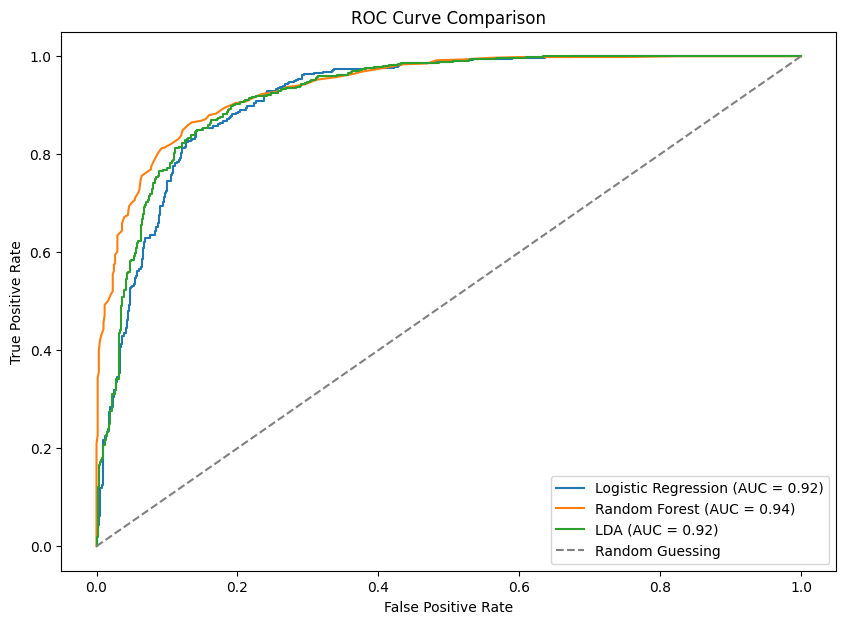

In [57]:
# ROC Curve Comparison
plt.figure(figsize=(10, 7))
models = {'Logistic Regression': logreg_os.predict_proba(X_test_resampled)[:, 1], 'Random Forest': rf_os.predict_proba(X_test_resampled)[:, 1], 'LDA': lda_os.predict_proba(X_test_resampled)[:, 1]}
for name, preds in models.items():
    fpr, tpr, _ = roc_curve(y_test_resampled, preds)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test_resampled, preds):.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')  # Add a line for random guessing

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend() # Add the legend
plt.show()

**ROC Curve Comparison and Analysis**

The ROC curve comparison plot illustrates the performance of three models: Logistic Regression, Random Forest, and LDA.

Each model's performance is depicted by a curve, with the area under the curve (AUC) serving as a measure of its overall effectiveness.

**Observations from the ROC Curve:**

- Logistic Regression: AUC = 0.92
- Random Forest: AUC = 0.94
- LDA: AUC = 0.92

Comparing the AUC values, the Random Forest model exhibits the highest AUC, indicating superior performance. This model outperforms the others.

**Curve Shapes:** The ROC curve for the Random Forest model is the steepest and closest to the top-left corner, suggesting it achieves higher true positive rates with lower false positive rates.

**Model Comparison:** Based on AUC and curve shapes, the Random Forest model demonstrates the best overall performance.

**Conclusion:**

The Random Forest model shows the best performance with an AUC of 0.94, highlighting its strong ability to distinguish between classes.

While the Logistic Regression and LDA models also perform well (AUC = 0.92), they fall slightly short of the Random Forest model.

Further investigation or model tuning may be necessary.

### Overall Conclusions

Based on the provided classification reports and ROC curve comparisons, here are some general conclusions and insights on the overall performance of the three models:

**Logistic Regression**
- **Train Performance:** High precision, recall, and f1-score (all around 0.87), indicating good performance on the training data.
- **Test Performance:** Slightly lower precision, recall, and f1-score (around 0.85), suggesting some drop in performance on the test data.
- **ROC Curve:** AUC of 0.92, indicating good overall performance in distinguishing between classes.

**Random Forest**
- **Train Performance:** Perfect precision, recall, and f1-score (all 1.00), which might indicate overfitting on the training data.
- **Test Performance:** Precision, recall, and f1-score are lower (around 0.83), showing a significant drop in performance on the test data.
- **ROC Curve:** AUC of 0.94, the highest among the three models, indicating strong performance in distinguishing between classes.

**Linear Discriminant Analysis (LDA)**
- **Train Performance:** Moderate precision, recall, and f1-score (around 0.78), indicating reasonable performance on the training data.
- **Test Performance:** Lower precision, recall, and f1-score (around 0.75), suggesting a drop in performance on the test data.
- **ROC Curve:** AUC of 0.92, similar to Logistic Regression, indicating good overall performance in distinguishing between classes.

**Overall Insights**
- **Best Performing Model:** Random Forest appears to have the highest AUC (0.94), indicating the best overall performance in terms of ROC curve comparison. However, the perfect scores on the training data suggest potential overfitting, which is a concern.
- **Balanced Performance:** Logistic Regression shows balanced performance with high precision, recall, and f1-score on both train and test datasets, along with a strong AUC of 0.92.
- **Moderate Performance:** LDA has the lowest performance metrics on both train and test datasets but still maintains a good AUC of 0.92.

Considering these factors, **Logistic Regression** might be the best overall performing model due to its balanced performance across train and test datasets, despite Random Forest having the highest AUC. ***Random Forest's potential overfitting*** should be carefully evaluated before making a final decision.

## **Part B: Market Risk Analysis (Complete Python Workflow)**

### **Problem Statement:**

The dataset contains 6 years of information (weekly stock information) on the stock prices of 10 different Indian Stocks. Calculate the mean and standard deviation on the stock returns and share insights. You are expected to do Market Risk Analysis using Python.

### Step 1: Load and Inspect the Data

In [58]:
# Load Dataset
df_market = pd.read_csv('Market Risk Dataset.csv')

In [59]:
# Glimpse of Data
df_market.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [60]:
# Fixing messy column names (containing spaces) for ease of use
df_market.columns = df_market.columns.str.replace(' ', '_')

In [61]:
# Checking top 5 rows again
df_market.head()

,Date,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [62]:
# Check the number of rows (observations) and the number of columns (variables)
print('The number of rows (observations) is',df_market.shape[0],'\n''The number of columns (variables) is',df_market.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


In [63]:
# Checking data types of all columns
df_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra_&_Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [64]:
# Check the basic measures of descriptive statistics for the continuous variables
df_market.describe().T

,count,mean,std,min,25%,50%,75%,max
Infosys,314.00,511.34,135.95,234.00,424.00,466.50,630.75,810.00
Indian_Hotel,314.00,114.56,22.51,64.00,96.00,115.00,134.00,157.00
Mahindra_&_Mahindra,314.00,636.68,102.88,284.00,572.00,625.00,678.00,956.00
Axis_Bank,314.00,540.74,115.84,263.00,470.50,528.00,605.25,808.00
SAIL,314.00,59.10,15.81,21.00,47.00,57.00,71.75,104.00
Shree_Cement,314.00,14806.41,4288.28,5543.00,10952.25,16018.50,17773.25,24806.00
Sun_Pharma,314.00,633.47,171.86,338.00,478.50,614.00,785.00,1089.00
Jindal_Steel,314.00,147.63,65.88,53.00,88.25,142.50,182.75,338.00
Idea_Vodafone,314.00,53.71,31.25,3.00,25.25,53.00,82.00,117.00
Jet_Airways,314.00,372.66,202.26,14.00,243.25,376.00,534.00,871.00


### Step 2: Plot Stock Price trend over time for different companies

In [65]:
# Convert 'Date' column to datetime objects and set it as the index.
# The dayfirst=True argument is crucial if the date format in your CSV is DD/MM/YYYY.
# If the date format is MM/DD/YYYY, remove or set dayfirst=False.
df_market['Date'] = pd.to_datetime(df_market['Date'], dayfirst=True)
df_market.set_index('Date', inplace=True)

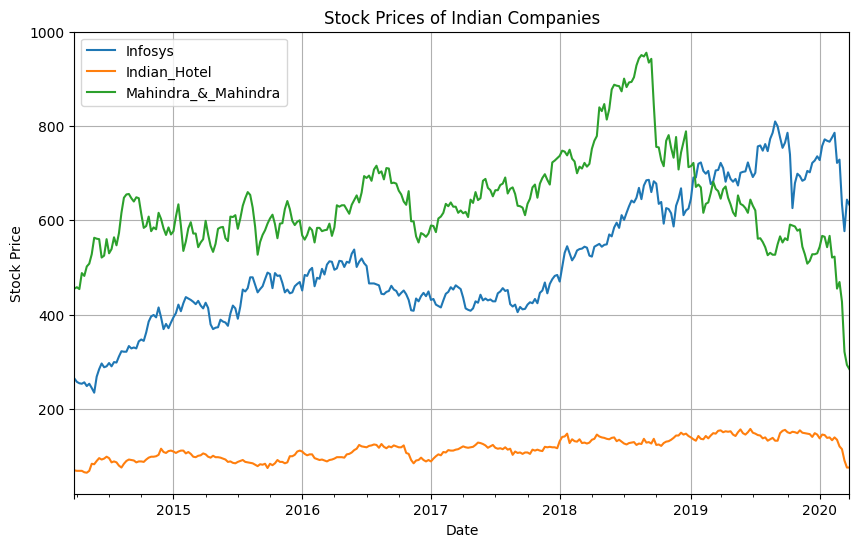

In [66]:
# Draw Stock Price Graph for three selected stocks
df_market[['Infosys', 'Indian_Hotel', 'Mahindra_&_Mahindra']].plot(figsize=(10, 6), title='Stock Prices of Indian Companies')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.show()

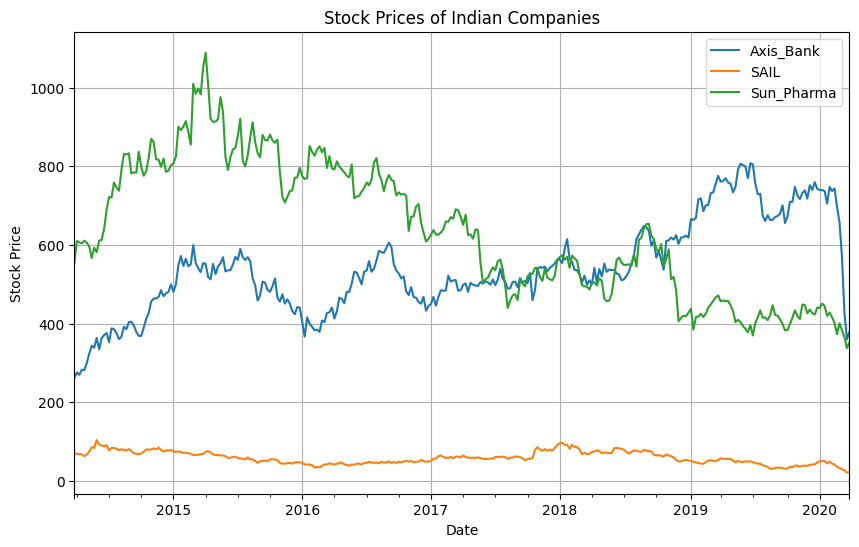

In [67]:
# Draw Stock Price Graph for three selected stocks
df_market[['Axis_Bank', 'SAIL', 'Sun_Pharma']].plot(figsize=(10, 6), title='Stock Prices of Indian Companies')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.show()

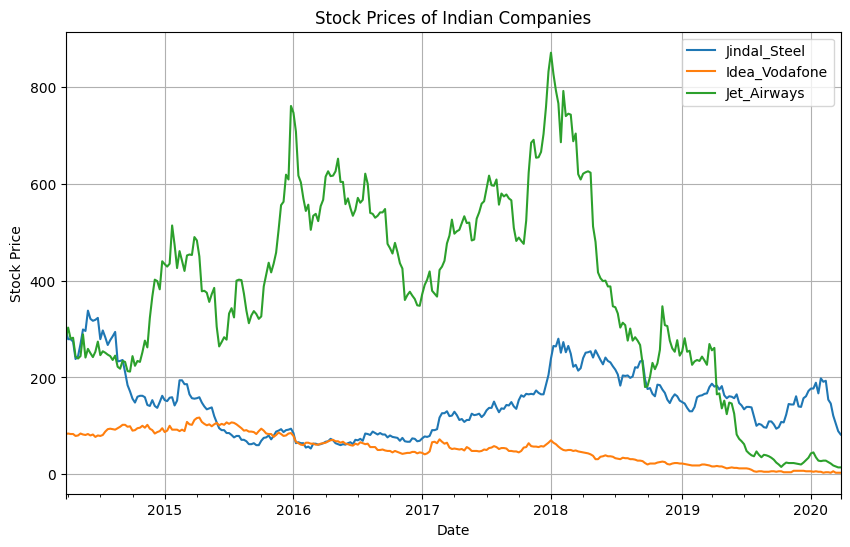

In [68]:
# Draw Stock Price Graph for three selected stocks
df_market[['Jindal_Steel', 'Idea_Vodafone', 'Jet_Airways']].plot(figsize=(10, 6), title='Stock Prices of Indian Companies')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.show()

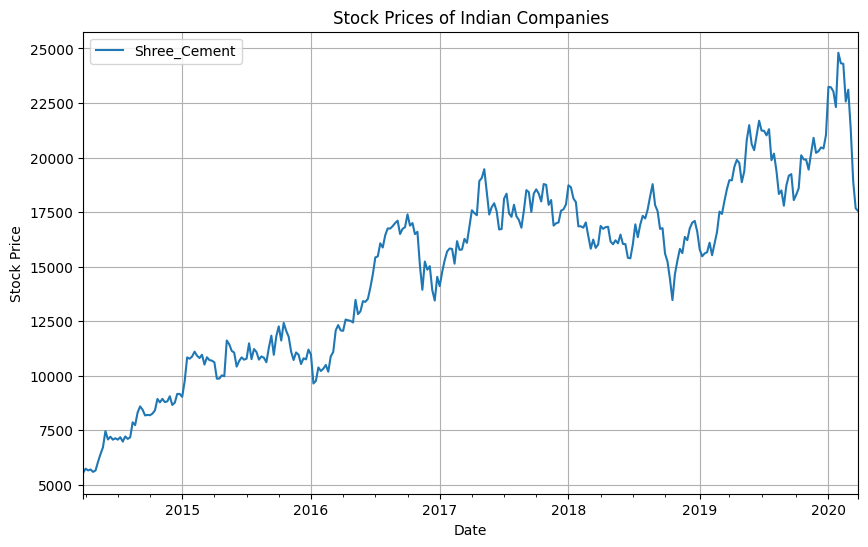

In [69]:
# Draw Stock Price Graph for 'Shree_Cement' stock
df_market[['Shree_Cement']].plot(figsize=(10, 6), title='Stock Prices of Indian Companies')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.show()

### Step 3: Analysing returns

#### Creating the returns data frame

In [70]:
# Calculate Returns for all stocks
returns = df_market.pct_change().dropna()

In [71]:
# Glimpse of Data
returns.head()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
Date,,,,,,,,,,
2014-04-07,-0.03,-0.01,0.01,0.05,0.03,0.03,0.10,-0.06,0.01,0.09
2014-04-14,-0.01,0.00,-0.01,-0.02,-0.03,-0.01,-0.00,0.00,-0.01,-0.08
2014-04-21,-0.00,0.00,0.07,0.05,0.00,0.01,-0.00,-0.02,0.00,0.01
2014-04-28,0.01,-0.04,-0.01,-0.00,-0.07,-0.02,0.01,-0.13,-0.05,-0.14
2014-05-05,-0.03,-0.02,0.04,0.06,0.06,0.01,-0.01,0.03,0.01,-0.02


In [72]:
# Check the number of rows (observations) and the number of columns (variables)
print('The number of rows (observations) is',returns.shape[0],'\n''The number of columns (variables) is',returns.shape[1])

The number of rows (observations) is 313 
The number of columns (variables) is 10


In [73]:
# Stock Returns Means and Standard Deviations
mean_returns = returns.mean()
std_returns = returns.std()

In [74]:
pd.options.display.float_format = '{:.6f}'.format

In [75]:
print("\nMean Returns:")
print(mean_returns)


Mean Returns:
Infosys                0.003409
Indian_Hotel           0.001369
Mahindra_&_Mahindra   -0.000717
Axis_Bank              0.002201
SAIL                  -0.001521
Shree_Cement           0.004487
Sun_Pharma            -0.000451
Jindal_Steel          -0.001313
Idea_Vodafone         -0.005080
Jet_Airways           -0.004805
dtype: float64


In [76]:
print("\nStandard Deviations:")
print(std_returns)


Standard Deviations:
Infosys               0.034910
Indian_Hotel          0.046914
Mahindra_&_Mahindra   0.039029
Axis_Bank             0.045018
SAIL                  0.062899
Shree_Cement          0.040192
Sun_Pharma            0.044616
Jindal_Steel          0.075079
Idea_Vodafone         0.110075
Jet_Airways           0.096473
dtype: float64


#### Plot the Returns' Mean vs. Risk

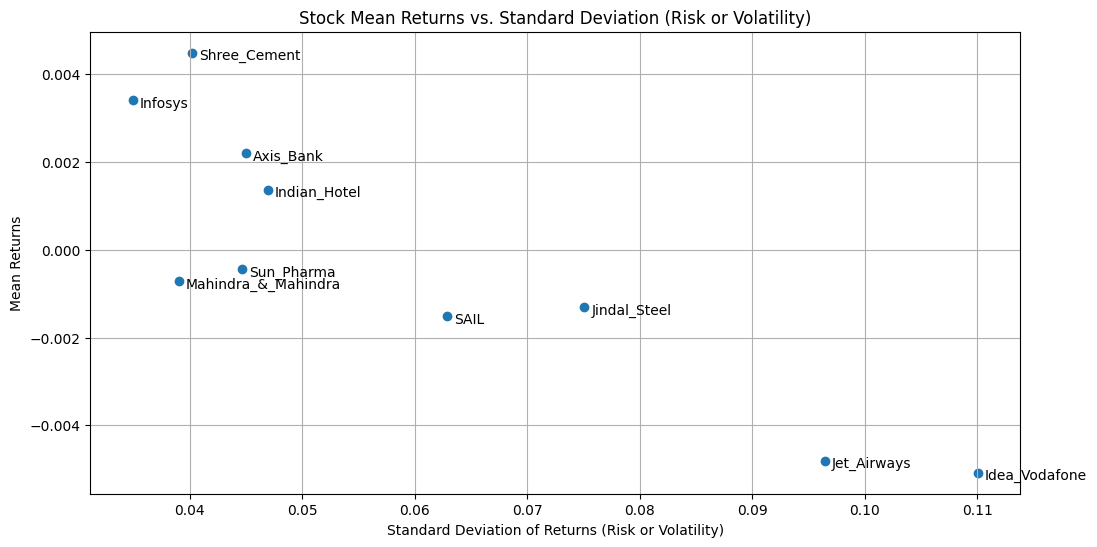

In [77]:
# Plot Returns' Mean vs. Standard Deviation (Risk or Volatility)
plt.figure(figsize=(12, 6))
plt.scatter(std_returns, mean_returns)
for label, x, y in zip(mean_returns.index, std_returns, mean_returns):
    plt.annotate(label, xy=(x, y), xytext=(5, -5), textcoords='offset points')

plt.xlabel('Standard Deviation of Returns (Risk or Volatility)')
plt.ylabel('Mean Returns')
plt.title('Stock Mean Returns vs. Standard Deviation (Risk or Volatility)')
plt.grid()
plt.show()

In [78]:
# Concatenate mean_returns and std_returns into one DataFrame
returns_summary = pd.concat([mean_returns, std_returns], axis=1)
returns_summary.columns = ['Mean Returns', 'Standard Deviation']

# Display the updated returns_summary DataFrame
returns_summary

,Mean Returns,Standard Deviation
Infosys,0.003409,0.034910
Indian_Hotel,0.001369,0.046914
Mahindra_&_Mahindra,-0.000717,0.039029
Axis_Bank,0.002201,0.045018
SAIL,-0.001521,0.062899
Shree_Cement,0.004487,0.040192
Sun_Pharma,-0.000451,0.044616
Jindal_Steel,-0.001313,0.075079
Idea_Vodafone,-0.005080,0.110075
Jet_Airways,-0.004805,0.096473


#### Inferences

**The Top 4 Best Stocks:**

1. **Shree_Cement**
  - Mean Returns: 0.004487
  - Standard Deviation: 0.040192

2. **Infosys**
  - Mean Returns: 0.003409
  - Standard Deviation: 0.034910

3. **Axis_Bank**
  - Mean Returns: 0.002201
  - Standard Deviation: 0.045018

4. **Indian_Hotel**
  - Mean Returns: 0.001369
  - Standard Deviation: 0.046914

These stocks have been selected based on their positive mean returns and the relatively low standard deviations, indicating a favorable balance between return and risk.

**The Top 4 Worst Stocks:**

1. **Idea_Vodafone**
  - Mean Returns: -0.005080
  - Standard Deviation: 0.110075

2. **Jet_Airways**
  - Mean Returns: -0.004805
  - Standard Deviation: 0.096473

3. **Jindal_Steel**
  - Mean Returns: -0.001313
  - Standard Deviation: 0.075079

4. **SAIL**
  - Mean Returns: -0.001521
  - Standard Deviation: 0.062899

Overall, these stocks provide an unfavorable balance between return and risk, making them unsuitable for investment.

### Conclusions and Recommendations

**Overall Conclusions:**

- Best Stocks: **Shree_Cement**, **Infosys**, **Axis_Bank**, and **Indian_Hotel** offer high returns with manageable risk.
- Worst Stocks: **Idea_Vodafone**, **Jet_Airways**, **Jindal_Steel**, and **SAIL** show negative returns and high risk.

**Recommendations:**

- Invest in: **Shree_Cement** and **Infosys** for their strong performance and low risk.
- Avoid: **Idea_Vodafone** and **Jet_Airways** due to their poor performance and high risk.

These recommendations balance return and risk, guiding better investment decisions.